# Credit EDA Assignment

### Problem statement
Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specializes in lending various types of loans to urban customers. You have to use EDA to analyze the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 
Exploratory Data Analysis study aims to identify patterns that indicate if an applicant will repay their instalments which may be used for taking further actions such as denying the loan, reducing the amount of loan, lending at a higher interest rate, etc. This will make sure that the applicants capable of repaying the loan are not rejected. 


In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##  1. Data Understanding 
###  a. Reading data

In [2]:
# reading data application_data
df1=pd.read_csv('application_data.csv') 
# reading data previous_application
df2=pd.read_csv('previous_application.csv') 

In [3]:
# Displaying all the rows and columns from the data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# showing 2 top rows of data
df1.head(2) 


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# shape of csv file
df1.shape 

(307511, 122)

In [6]:
# checking the data types 
df1.dtypes 

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


### b.Checking the missing values

In [7]:
# Checking the missing values
df1.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
percent_missing = df1.isnull().sum() * 100 / len(df1)
percent_missing

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [9]:
# checking columns with more than 40% of missing values
len(percent_missing[percent_missing.values>40])
percent_missing=percent_missing[percent_missing.values>40]
len(percent_missing)

49

In [10]:
percent_missing

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

### c. Removing column which has missing data more than 40 %


In [11]:
# Renoving column which has missing data more than 40 %
df1.drop(percent_missing.index, axis=1, inplace = True)
df1.shape

(307511, 73)

In [12]:
df1.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
null=df1.isnull().sum()
fill=df1.isnull().sum()[null>0]
fill

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [14]:
# considering to important columns
d=df1[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE']]

In [15]:
d.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School


In [16]:
d.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
d.shape

(307511, 34)

### d. Handling Nulls

In [18]:
# There are 5 columns with null
d.isnull().sum() 

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
R

In [19]:
# values to be used for filling null values
mean1=d.AMT_ANNUITY.mean()
mean2=d.AMT_GOODS_PRICE.mean()
mode1=d.NAME_TYPE_SUITE.mode()[0]
mode2=d.OCCUPATION_TYPE.mode()[0]                
median1=d.CNT_FAM_MEMBERS.median()   
print('mean1=',mean1)
print('mean2=',mean2)
print('mode1=',mode1)
print('mode2=',mode2)
print('median1=',median1)

mean1= 27108.573909183444
mean2= 538396.2074288895
mode1= Unaccompanied
mode2= Laborers
median1= 2.0


In [20]:
# filling mean1 in AMT_ANNUITY column
d['AMT_ANNUITY'].fillna(mean1,inplace=True) 
# filling mean2 in AMT_GOODS_PRICE column
d['AMT_GOODS_PRICE'].fillna(mean2,inplace=True) 
# filling Unaccompanied in NAME_TYPE_SUITE column
d['NAME_TYPE_SUITE'].fillna(mode1,inplace=True) 
# filling Laborers  in OCCUPATION_TYPE column
d['OCCUPATION_TYPE'].fillna(mode2,inplace=True)  
# filling 2.0(median) in CNT_FAM_MEMBERS column
d['CNT_FAM_MEMBERS'].fillna(median1,inplace=True)  

In [21]:
# converting count of family memeber to integer type
d['CNT_FAM_MEMBERS']=d['CNT_FAM_MEMBERS'].astype('int64')
# converting into positive integer
d.DAYS_EMPLOYED = d.DAYS_EMPLOYED.apply(lambda x: abs(x))
# converting into positive integer
d.DAYS_REGISTRATION = d.DAYS_REGISTRATION.apply(lambda x: abs(x))
# converting into positive integer
d.DAYS_ID_PUBLISH = d.DAYS_ID_PUBLISH.apply(lambda x: abs(x)) 
# converting DAYS_BIRTH into positive integer
d.DAYS_BIRTH=d.DAYS_BIRTH.apply(lambda x:abs(x)) 

### e. Separating in categorical and numerical columns

In [22]:
category_columns=d.select_dtypes(exclude=[np.number])
category_columns.head(3)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government


In [23]:
numerical_columns=d.select_dtypes(include=[np.number])
numerical_columns.head(3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1,2,2,10,0,0,0,0,0,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2,1,1,11,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1,2,2,9,0,0,0,0,0,0


## 2. Univariate analysis for Numerical variables

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


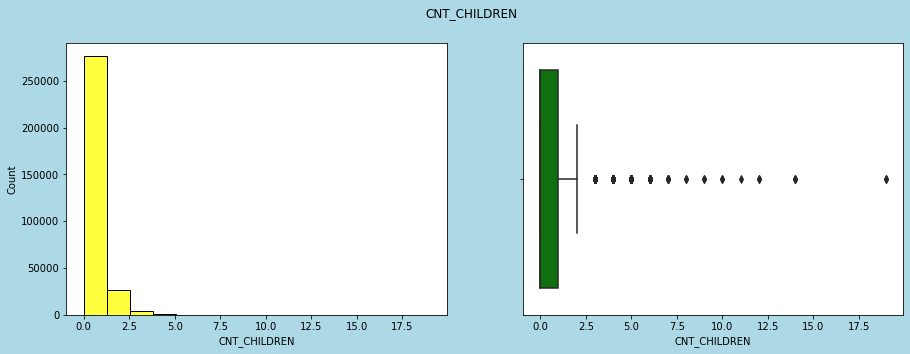

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


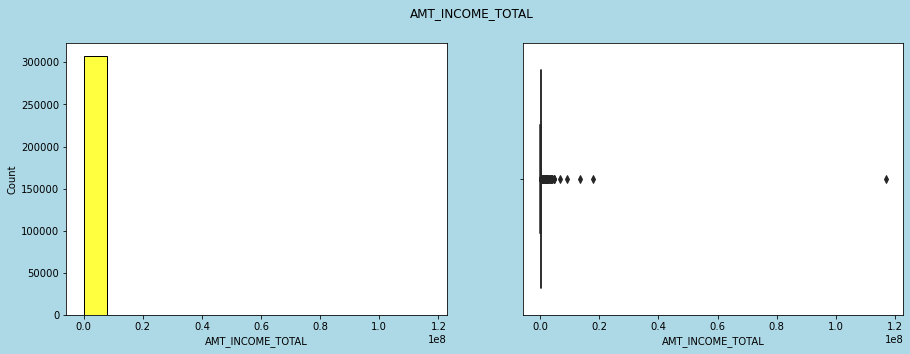

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


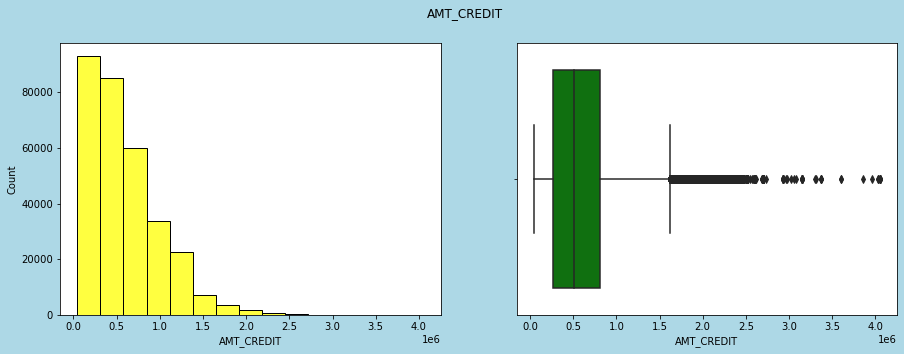

count    307511.000000
mean      27108.573909
std       14493.454517
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


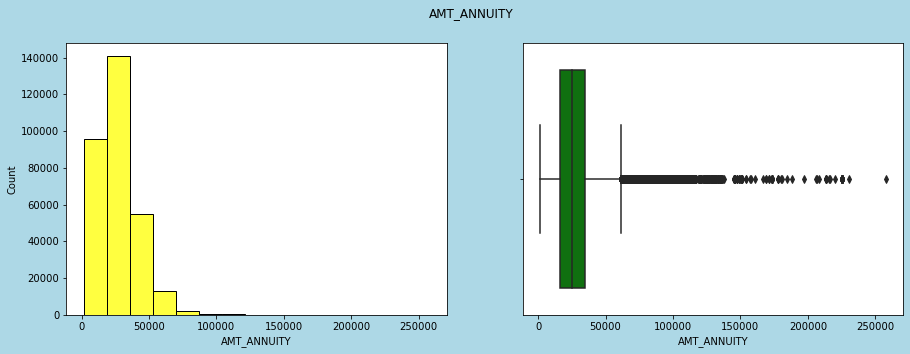

count    3.075110e+05
mean     5.383962e+05
std      3.692794e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


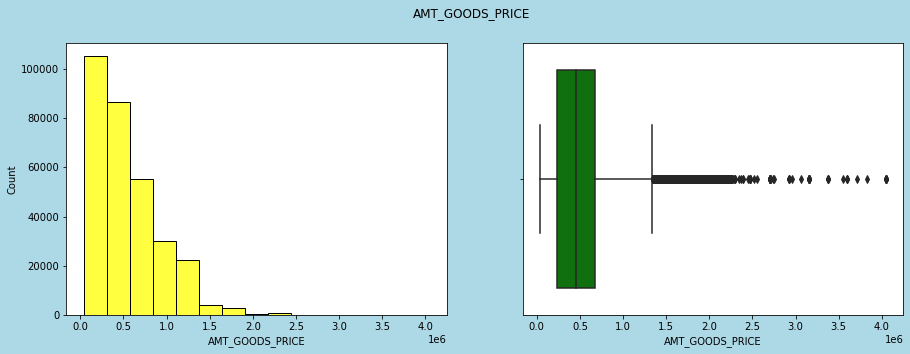

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


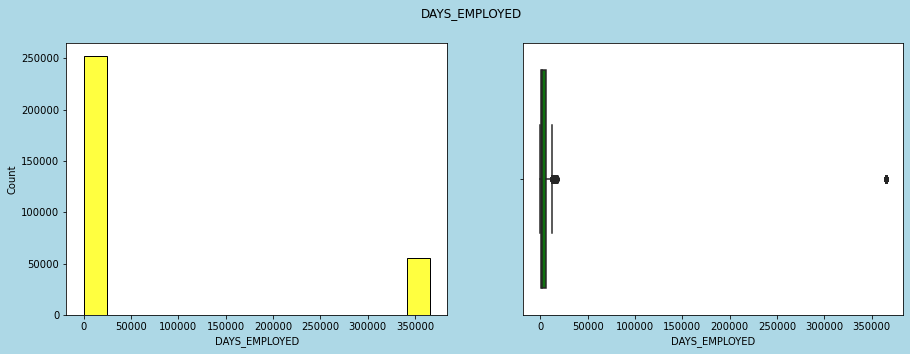

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


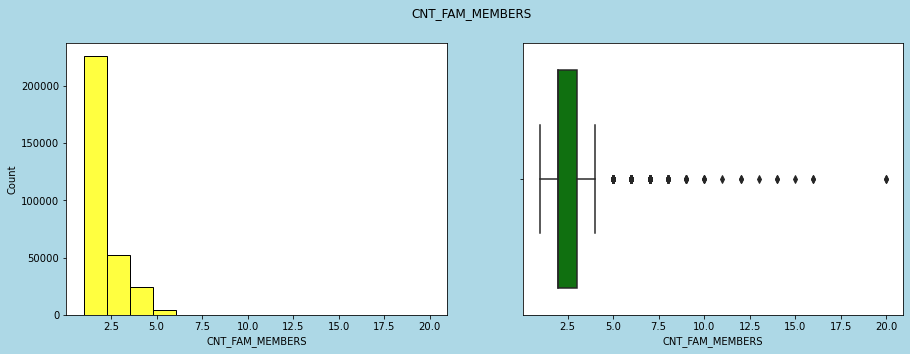

In [24]:
# Checking outliers for this columns.
#CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,CNT_FAM_MEMBERS

col_to_check=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_FAM_MEMBERS']
for col in col_to_check:
    print(d[col].describe())
    plt.figure(figsize=(15,5),facecolor='lightblue')
    plt.suptitle(col)
    plt.subplot(121)
    sns.histplot(x = d[col], color = "yellow",bins=(15)) 
    plt.subplot(122)
    sns.boxplot(x = d[col], color = "green") 
    plt.show()

0    282686
1     24825
Name: TARGET, dtype: int64


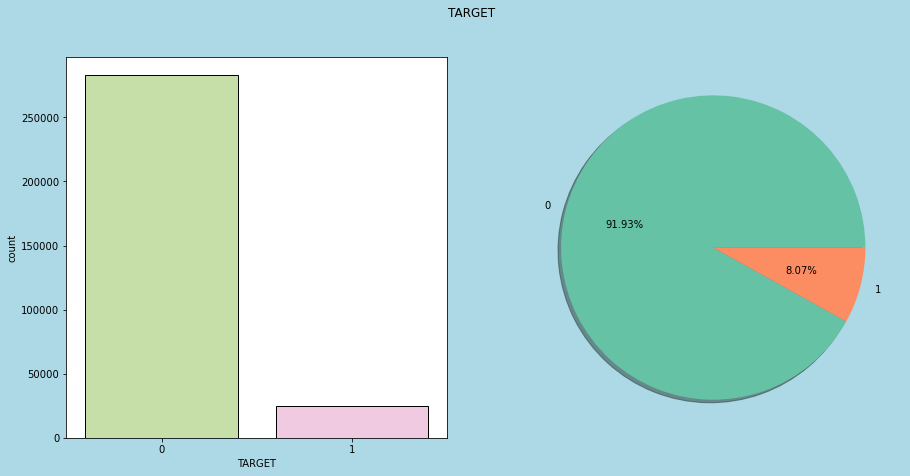

In [25]:
print(d['TARGET'].value_counts())
plt.figure(figsize=(15,7),facecolor='lightblue')
plt.suptitle('TARGET')
plt.subplot(121)
sns.countplot(x=d['TARGET'],ec='black',palette='PiYG_r')
plt.subplot(122)
perc=d['TARGET'].value_counts()
lbl=list(d['TARGET'].value_counts().index)
plt.pie(perc,labels=lbl,colors=sns.color_palette('Set2'),shadow=True,autopct='%.2f%%')
plt.show()

### Conclusion:
1. 8.07% people were able to pay on time.
2. 91.93% people were able to pay on time.


## 3. Univariate Analysis of Categorical Variable

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


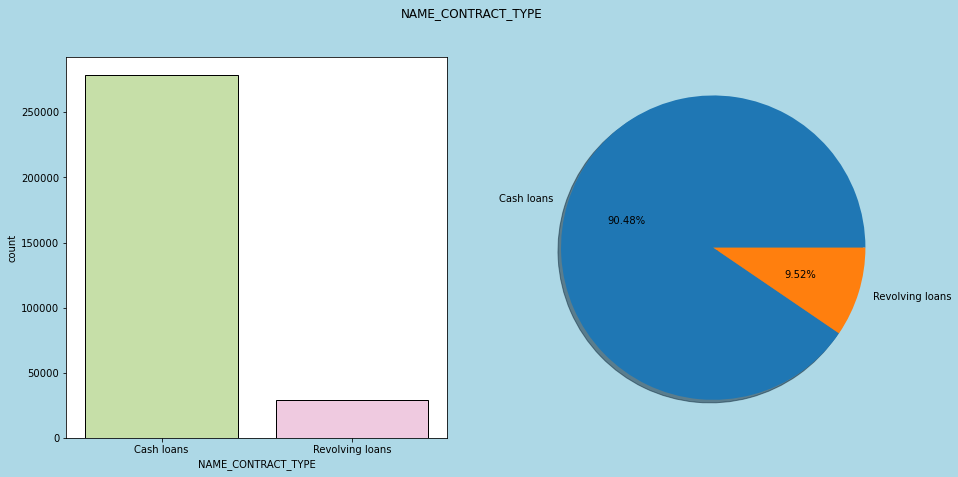

In [26]:
print(d['NAME_CONTRACT_TYPE'].value_counts())
plt.figure(figsize=(15,7),facecolor='lightblue')
plt.suptitle('NAME_CONTRACT_TYPE')
plt.subplot(121)
sns.countplot(x=d['NAME_CONTRACT_TYPE'],ec='black',palette='PiYG_r')
plt.subplot(122)
perc=d['NAME_CONTRACT_TYPE'].value_counts()
lbl=list(d['NAME_CONTRACT_TYPE'].value_counts().index)
plt.pie(perc,labels=lbl,shadow=True,autopct='%.2f%%')
plt.show()

### Conclusion :
1.cash loans are more compared to revoling loans 

                                         Distribution of  SK_ID_CURR


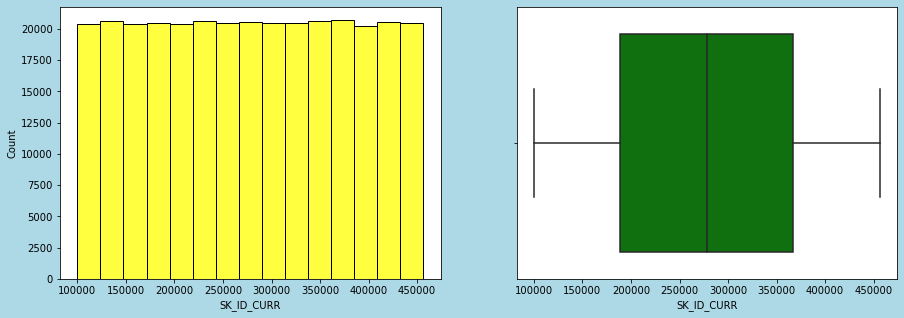

                                         Distribution of  TARGET


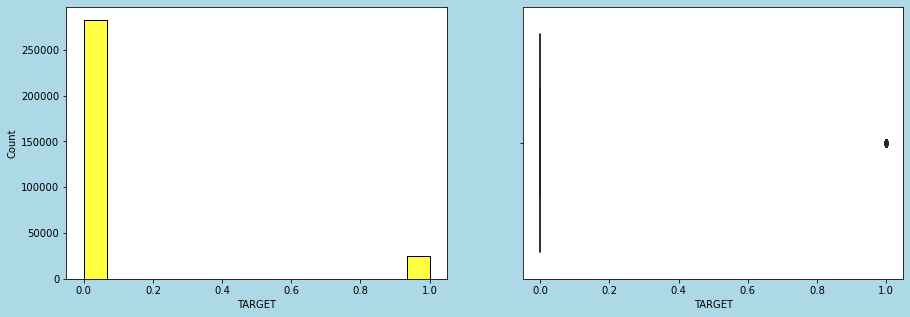

                                         Distribution of  CNT_CHILDREN


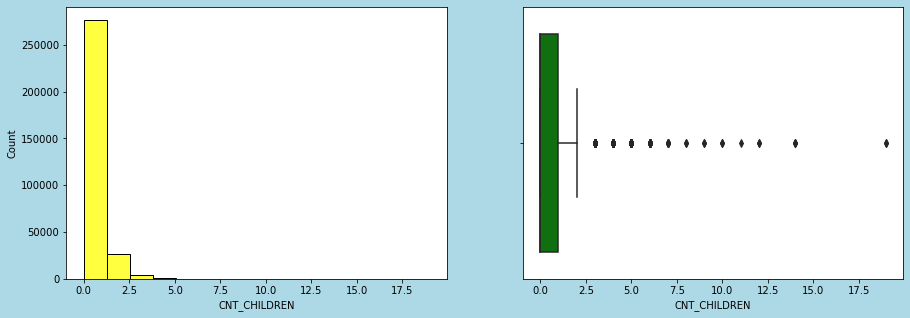

                                         Distribution of  AMT_INCOME_TOTAL


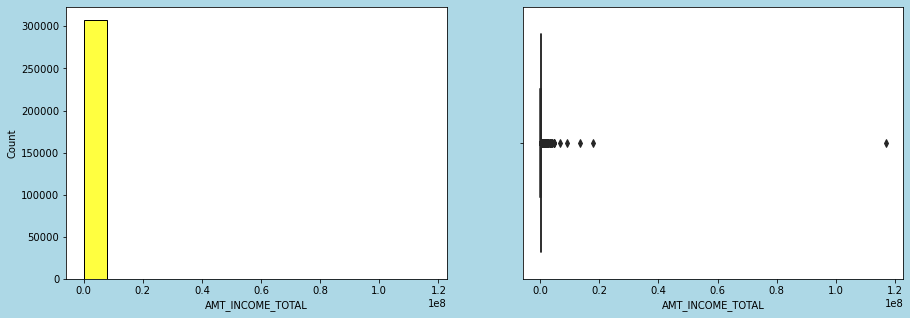

                                         Distribution of  AMT_CREDIT


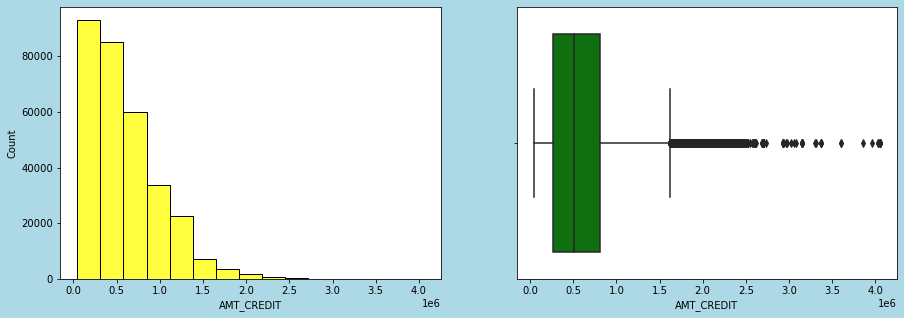

                                         Distribution of  AMT_ANNUITY


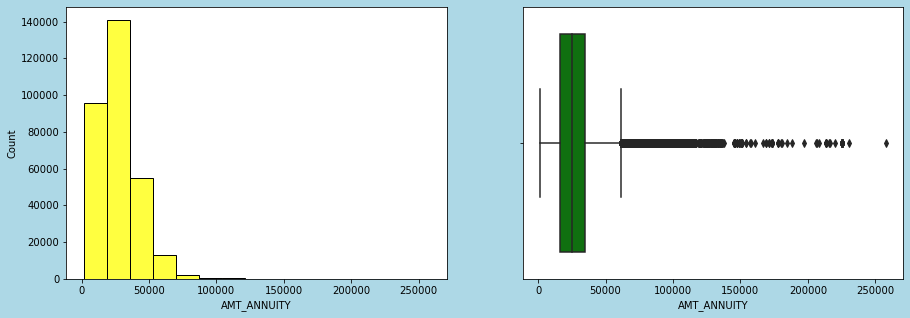

                                         Distribution of  AMT_GOODS_PRICE


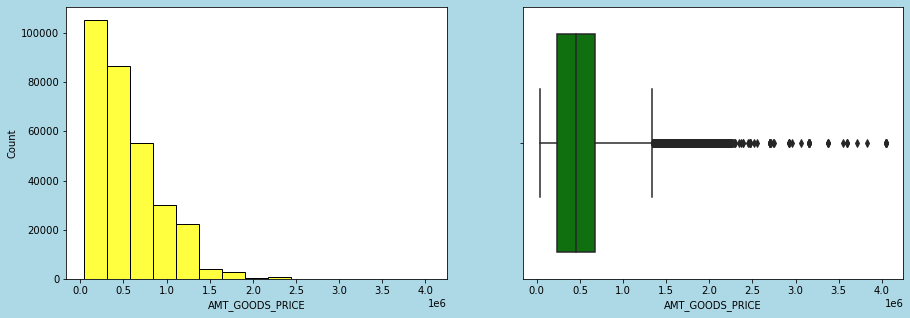

                                         Distribution of  REGION_POPULATION_RELATIVE


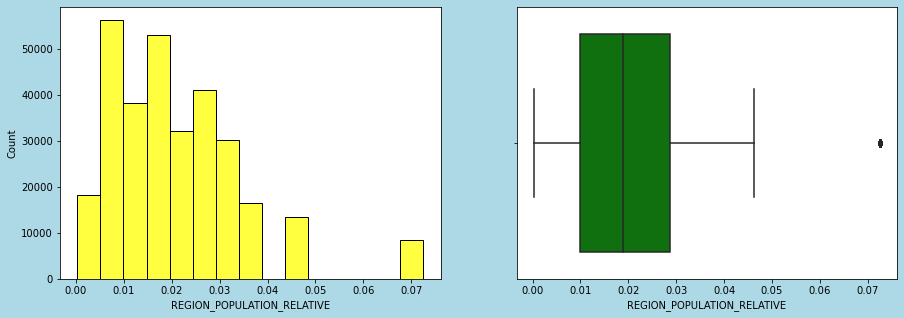

                                         Distribution of  DAYS_BIRTH


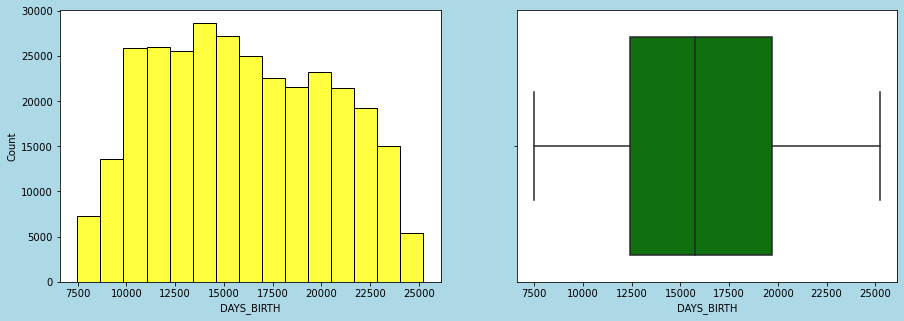

                                         Distribution of  DAYS_EMPLOYED


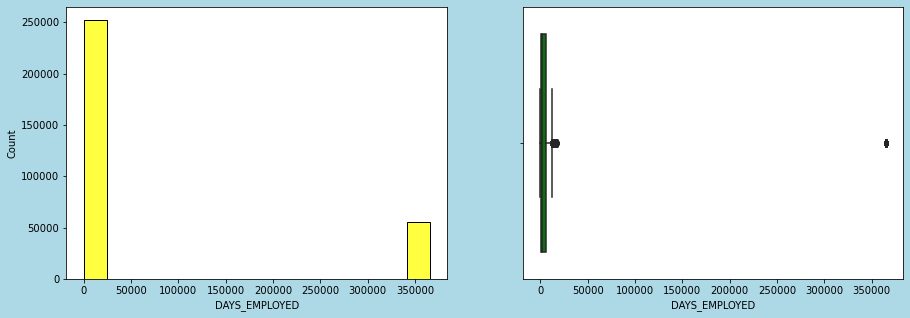

                                         Distribution of  DAYS_REGISTRATION


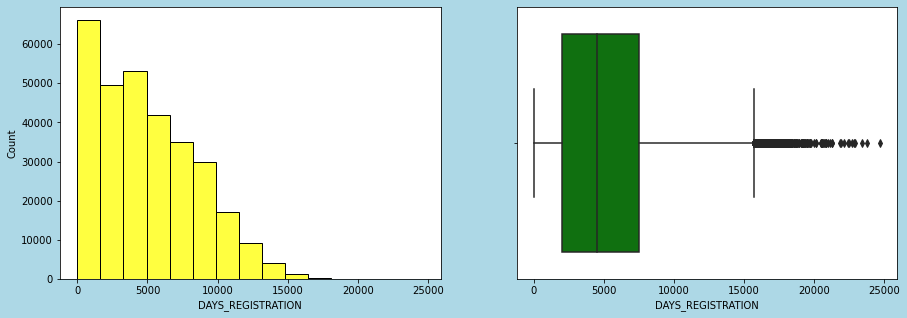

                                         Distribution of  DAYS_ID_PUBLISH


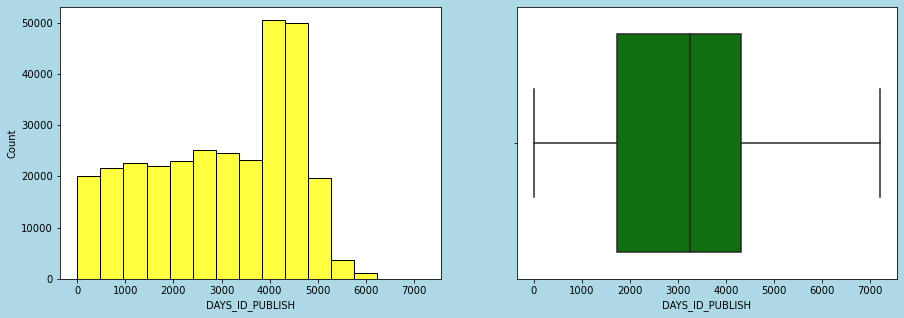

                                         Distribution of  CNT_FAM_MEMBERS


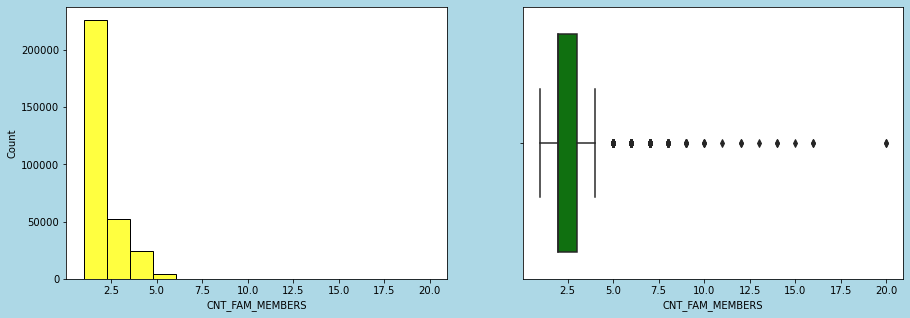

                                         Distribution of  REGION_RATING_CLIENT


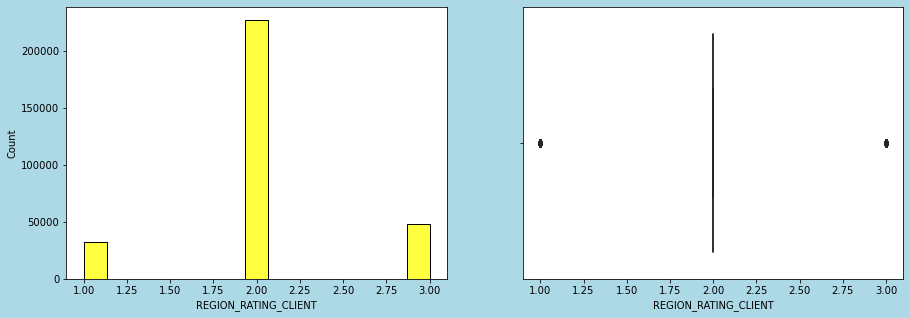

                                         Distribution of  REGION_RATING_CLIENT_W_CITY


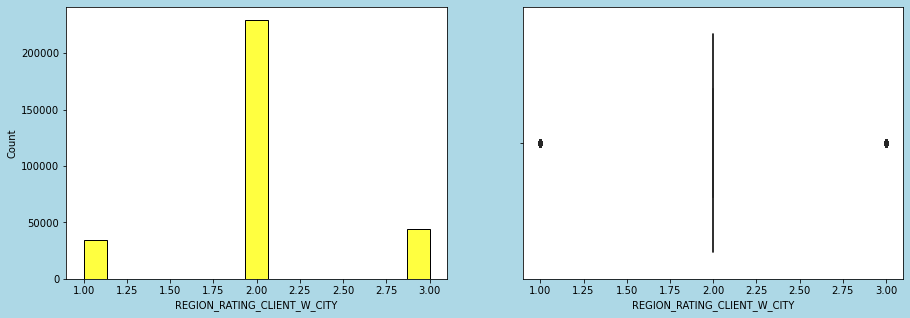

                                         Distribution of  HOUR_APPR_PROCESS_START


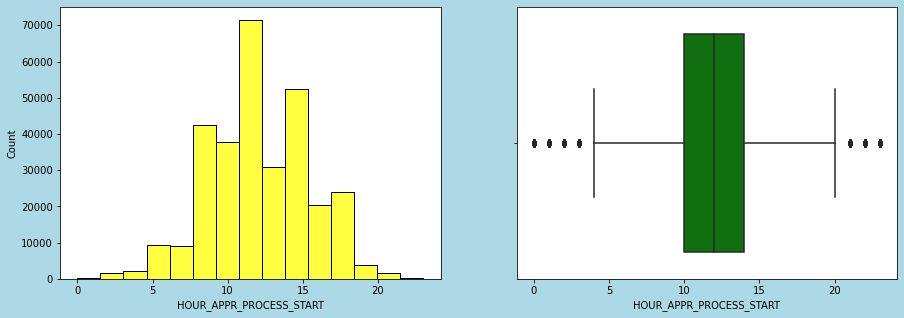

                                         Distribution of  REG_REGION_NOT_LIVE_REGION


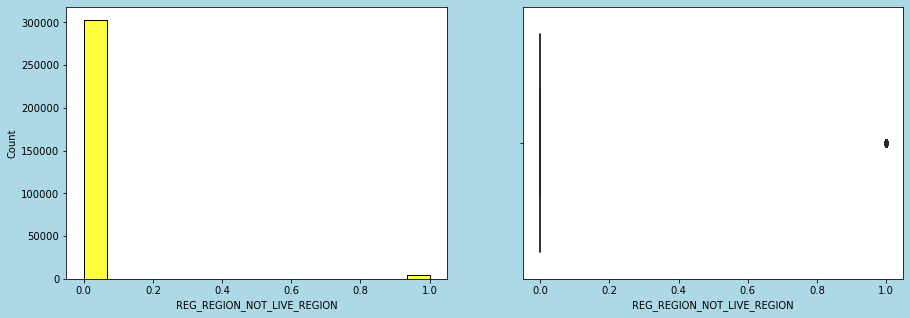

                                         Distribution of  REG_REGION_NOT_WORK_REGION


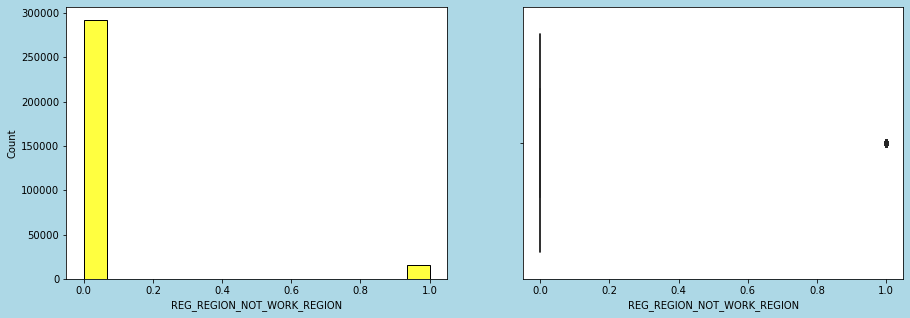

                                         Distribution of  LIVE_REGION_NOT_WORK_REGION


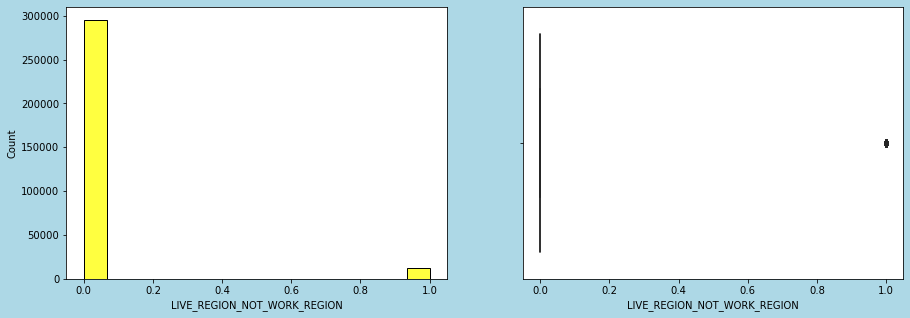

                                         Distribution of  REG_CITY_NOT_LIVE_CITY


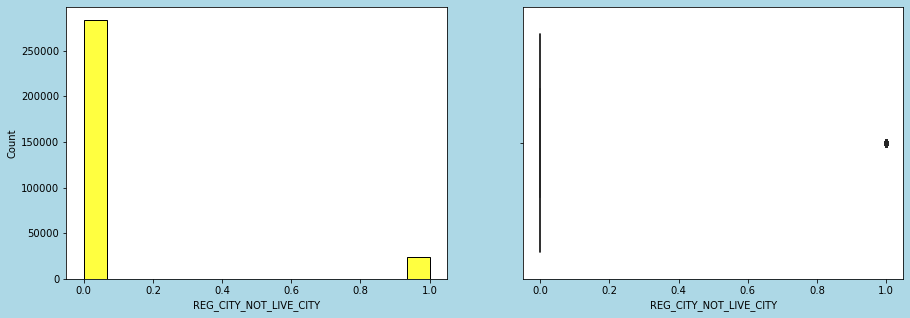

                                         Distribution of  REG_CITY_NOT_WORK_CITY


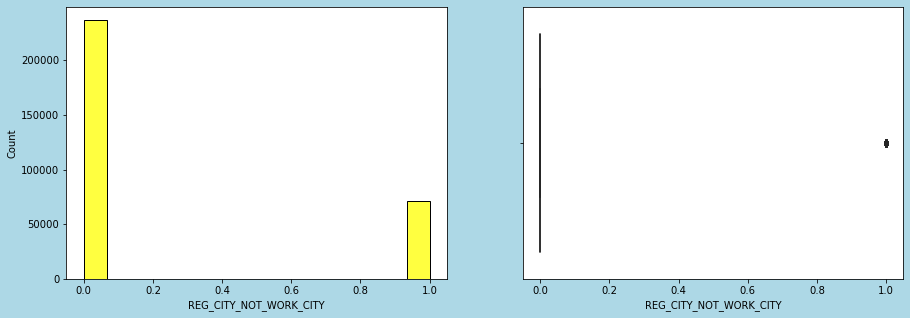

                                         Distribution of  LIVE_CITY_NOT_WORK_CITY


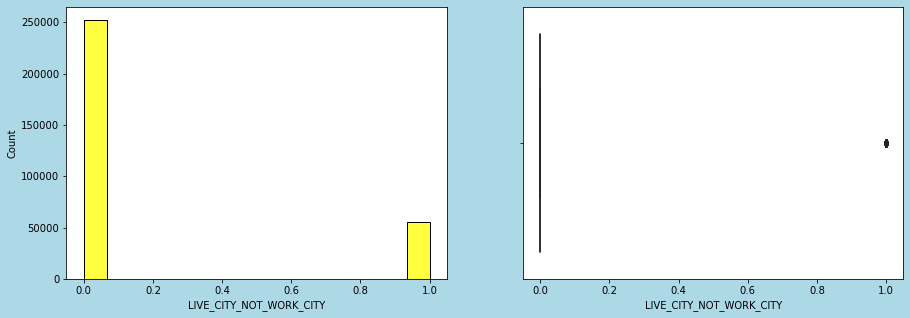

In [28]:
for col in numerical_columns:
    plt.figure(figsize=(15,5),facecolor='lightblue')
    print('                                        ', 'Distribution of ',d[col].name)
    plt.subplot(121)
    sns.histplot(x = d[col], color = "yellow",bins=(15)) 
    plt.subplot(122)
    sns.boxplot(x = d[col], color = "green") 
    plt.show()

## 4. Univariate analysis for Categorical variables


                                    Distribution of  NAME_CONTRACT_TYPE


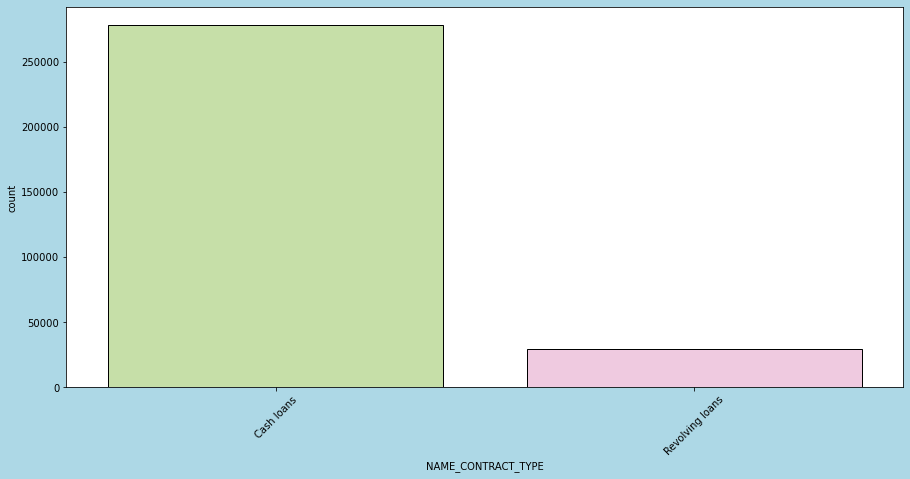

                                    Distribution of  CODE_GENDER


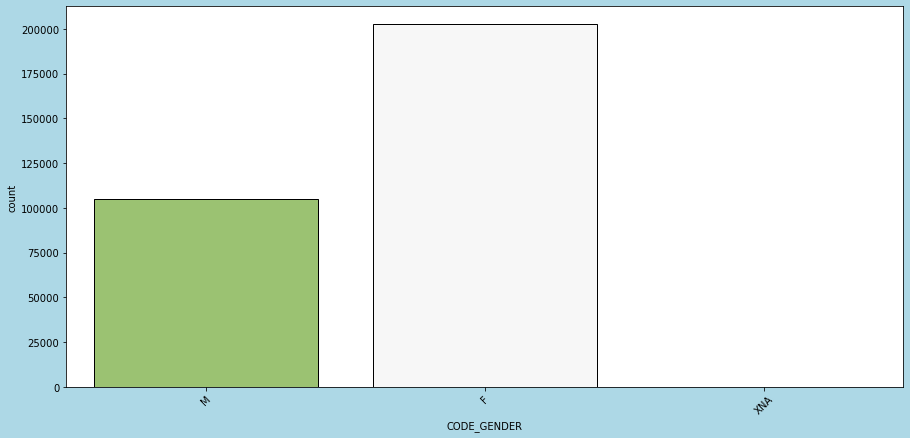

                                    Distribution of  FLAG_OWN_CAR


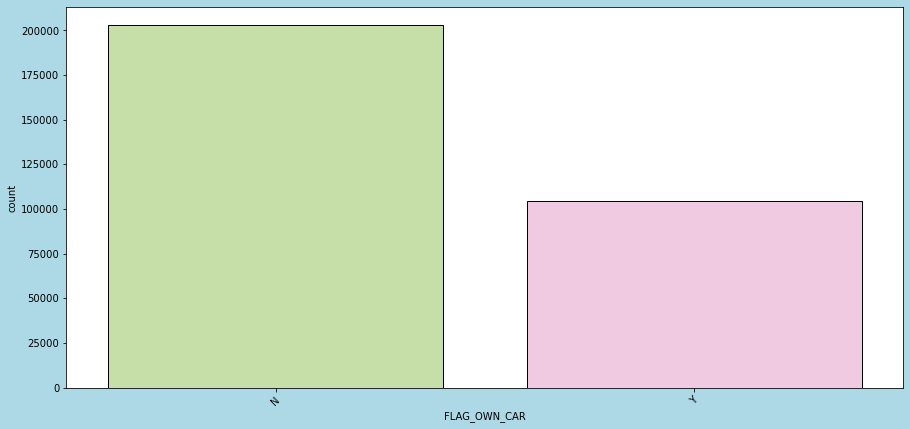

                                    Distribution of  FLAG_OWN_REALTY


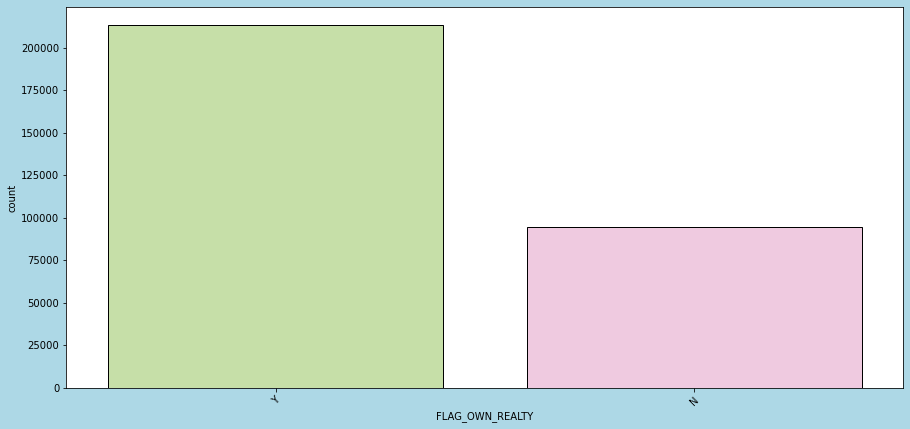

                                    Distribution of  NAME_TYPE_SUITE


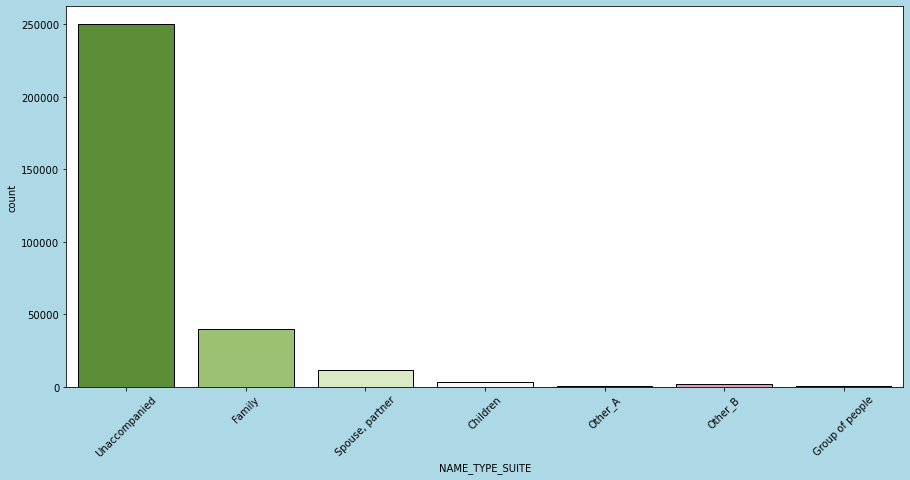

                                    Distribution of  NAME_INCOME_TYPE


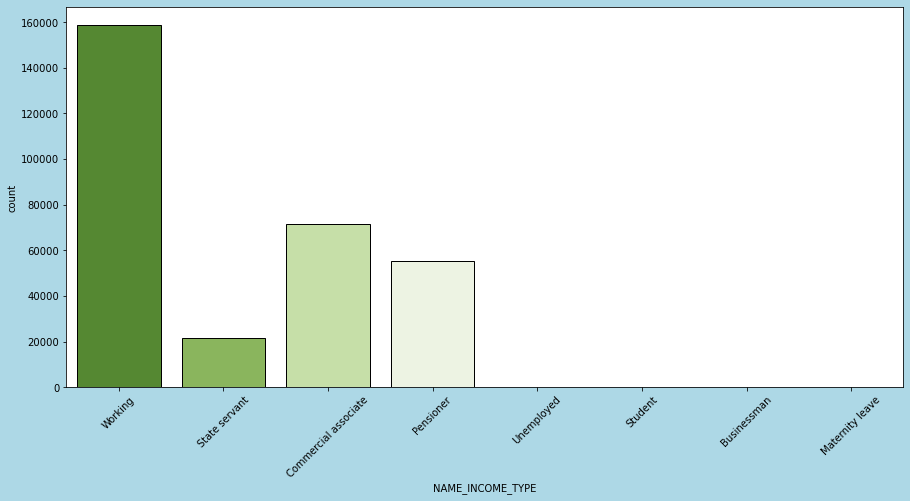

                                    Distribution of  NAME_EDUCATION_TYPE


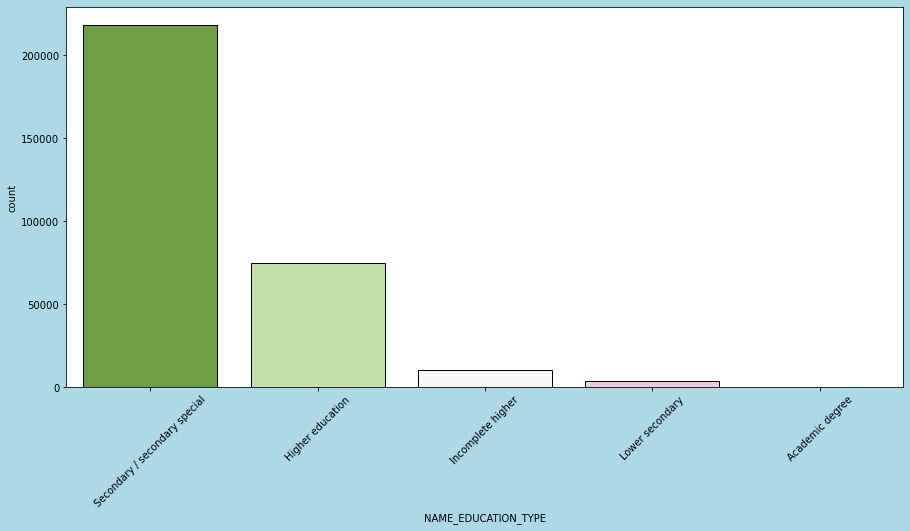

                                    Distribution of  NAME_FAMILY_STATUS


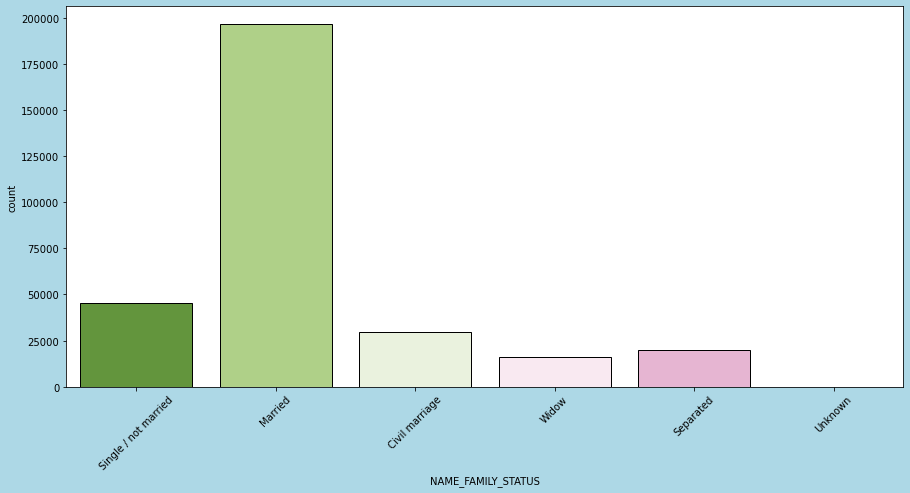

                                    Distribution of  NAME_HOUSING_TYPE


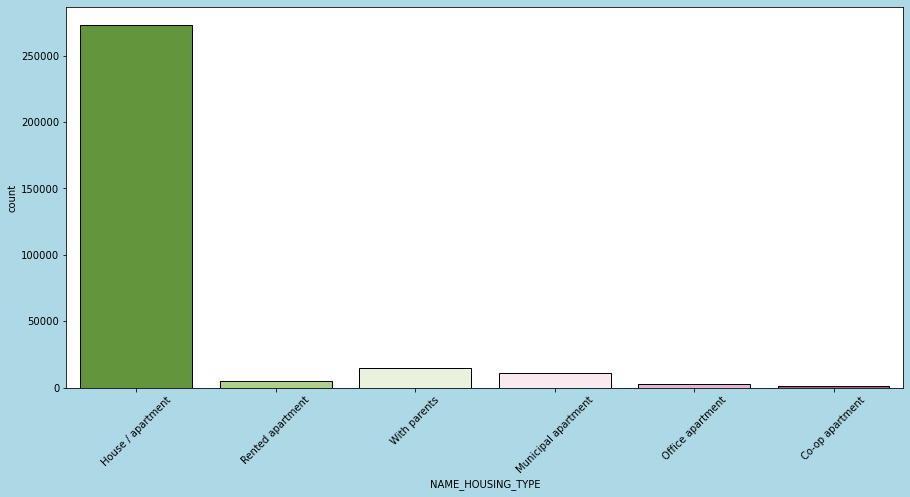

                                    Distribution of  OCCUPATION_TYPE


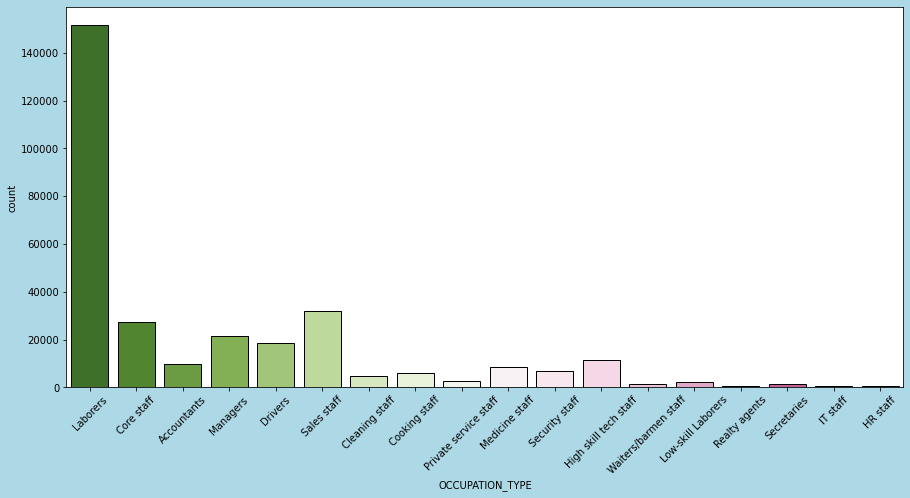

                                    Distribution of  WEEKDAY_APPR_PROCESS_START


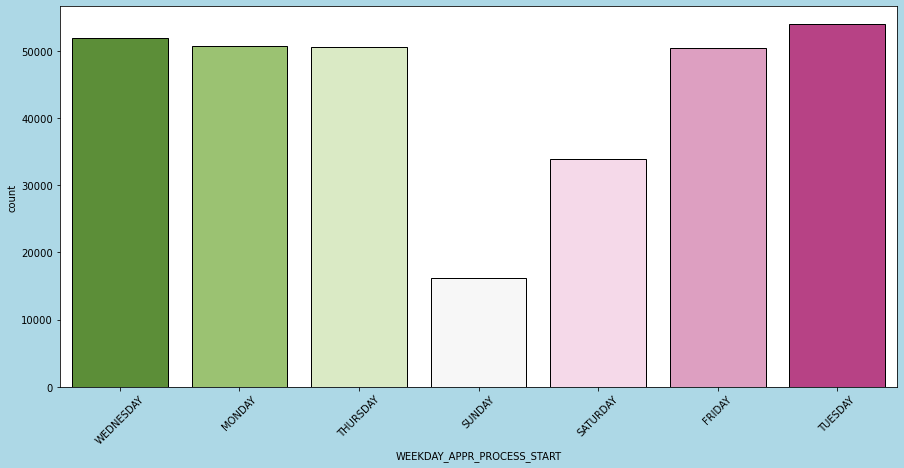

                                    Distribution of  ORGANIZATION_TYPE


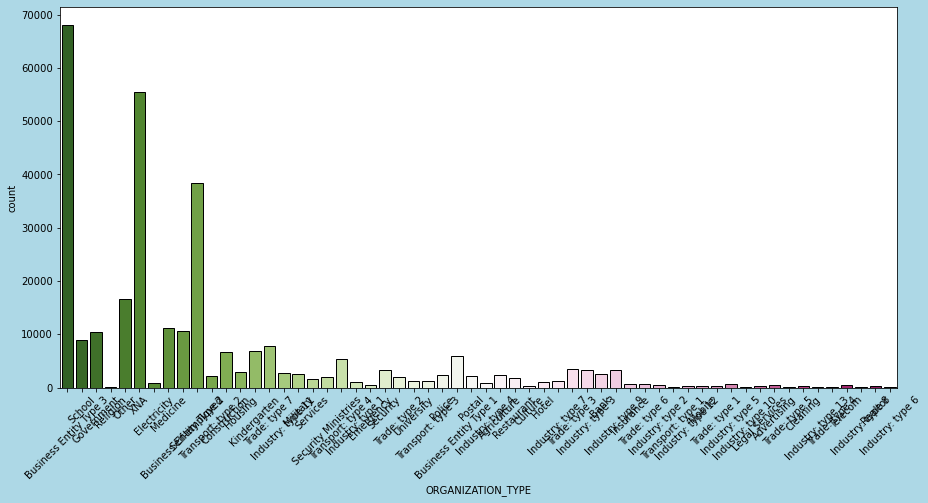

In [29]:
for column in category_columns:
    plt.figure(figsize=(15,7),facecolor='lightblue')
    print('                                   ', 'Distribution of ',d[column].name)
    sns.countplot(x=d[column],ec='black',palette='PiYG_r')
    plt.xticks(rotation=45)
    plt.show()

In [30]:
target0=d[d['TARGET']==0]
target1=d[d['TARGET']==1]
print(target0.shape)
print(target1.shape)

(282686, 34)
(24825, 34)


## 5. Univariate analysis of numerical column for TARGET=0 (Applicants making payments on time)

                                         Distribution of  SK_ID_CURR


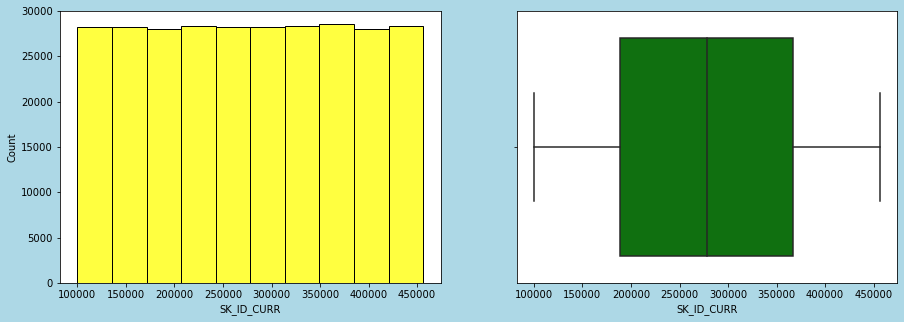

                                         Distribution of  TARGET


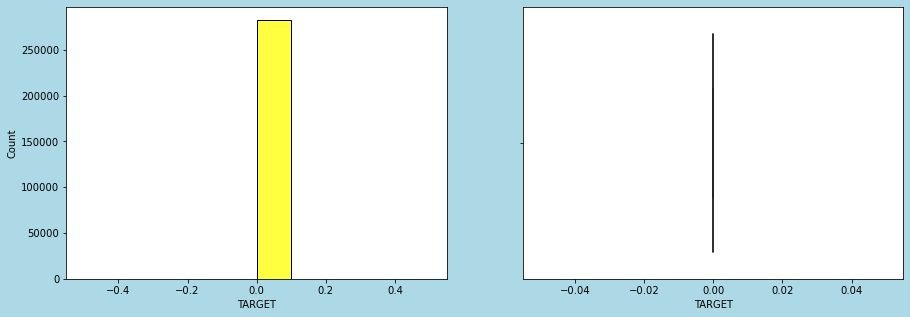

                                         Distribution of  CNT_CHILDREN


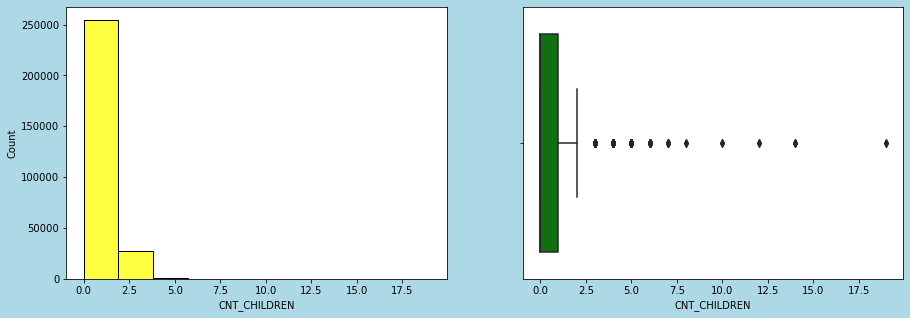

                                         Distribution of  AMT_INCOME_TOTAL


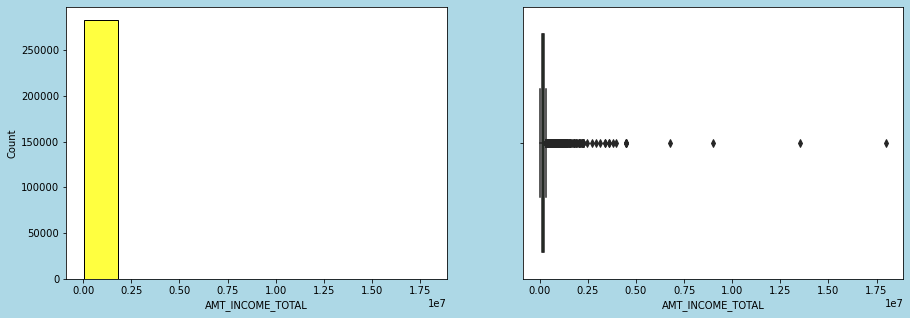

                                         Distribution of  AMT_CREDIT


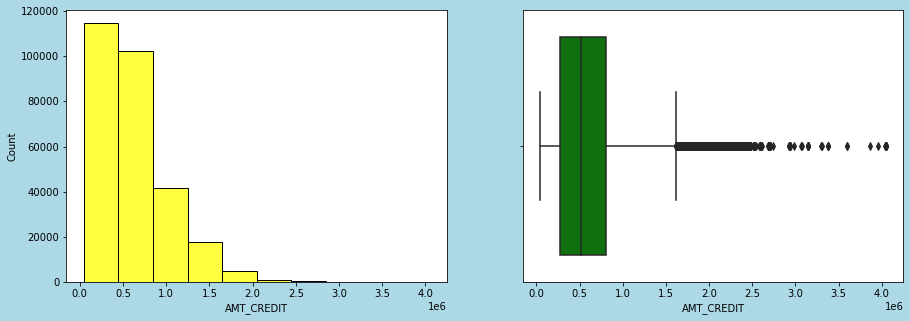

                                         Distribution of  AMT_ANNUITY


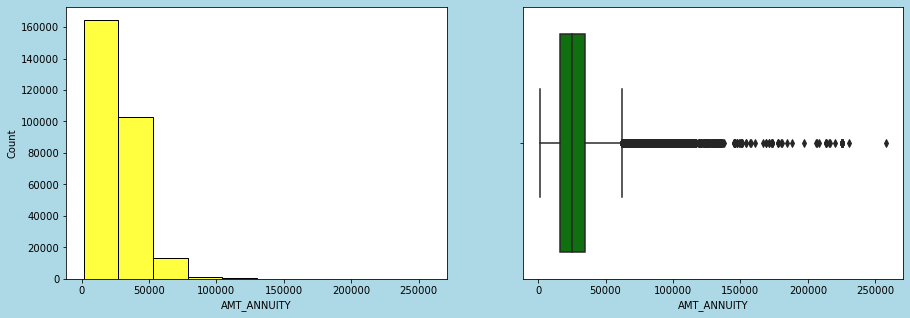

                                         Distribution of  AMT_GOODS_PRICE


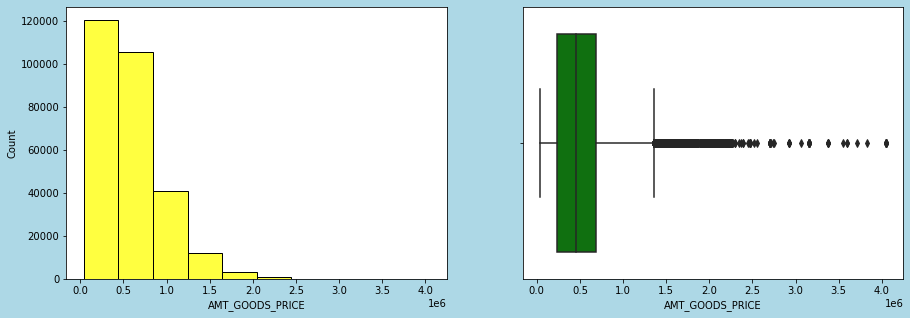

                                         Distribution of  REGION_POPULATION_RELATIVE


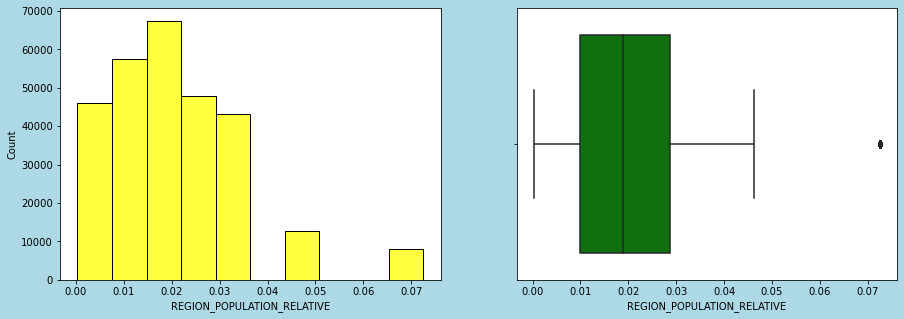

                                         Distribution of  DAYS_BIRTH


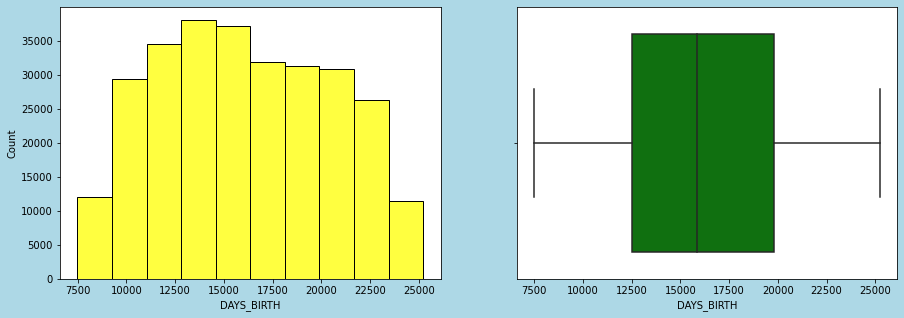

                                         Distribution of  DAYS_EMPLOYED


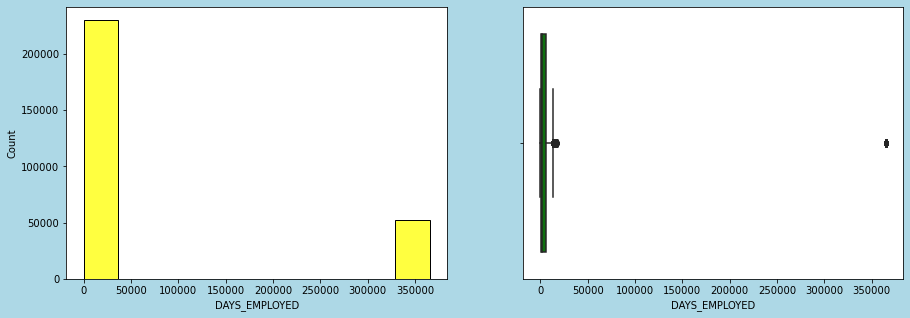

                                         Distribution of  DAYS_REGISTRATION


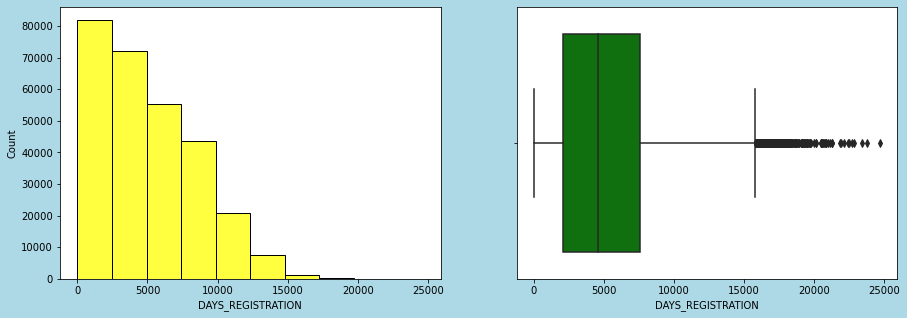

                                         Distribution of  DAYS_ID_PUBLISH


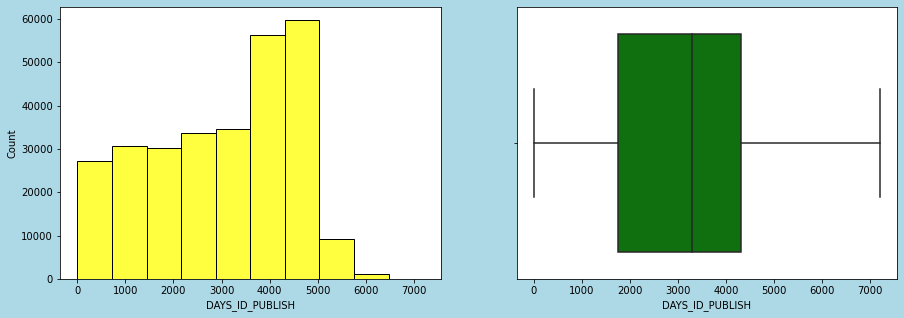

                                         Distribution of  CNT_FAM_MEMBERS


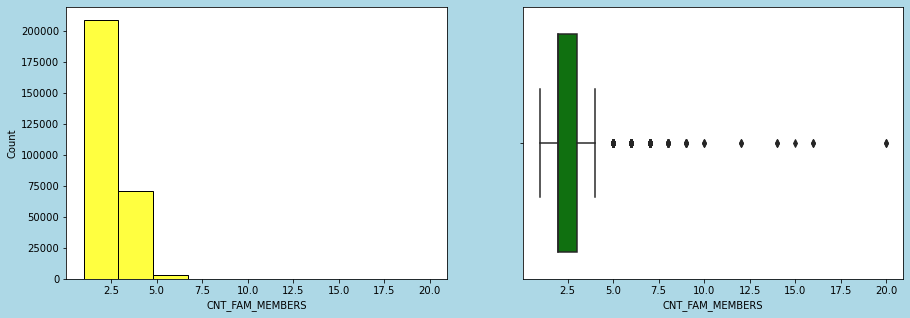

                                         Distribution of  REGION_RATING_CLIENT


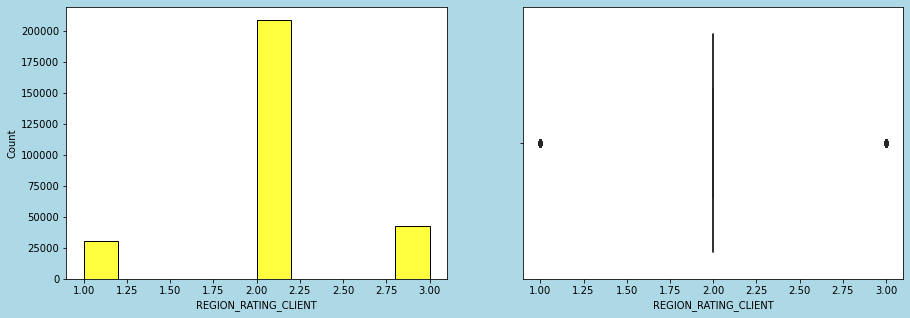

                                         Distribution of  REGION_RATING_CLIENT_W_CITY


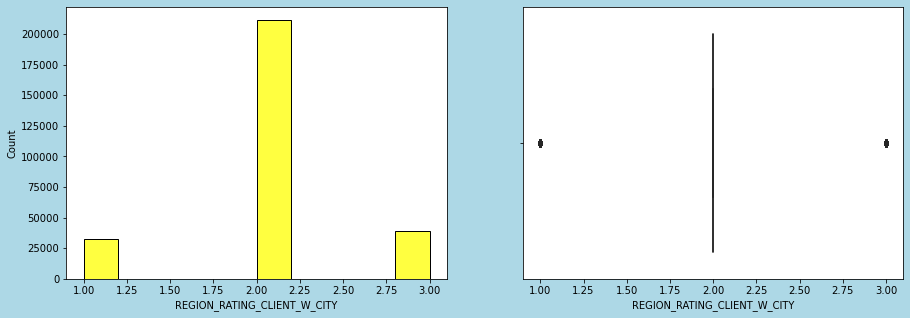

                                         Distribution of  HOUR_APPR_PROCESS_START


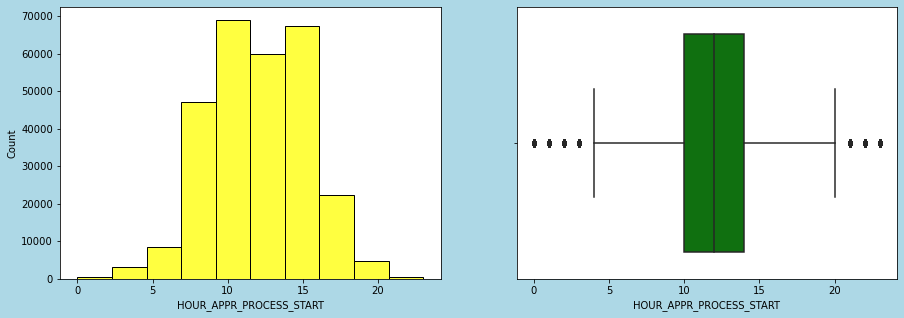

                                         Distribution of  REG_REGION_NOT_LIVE_REGION


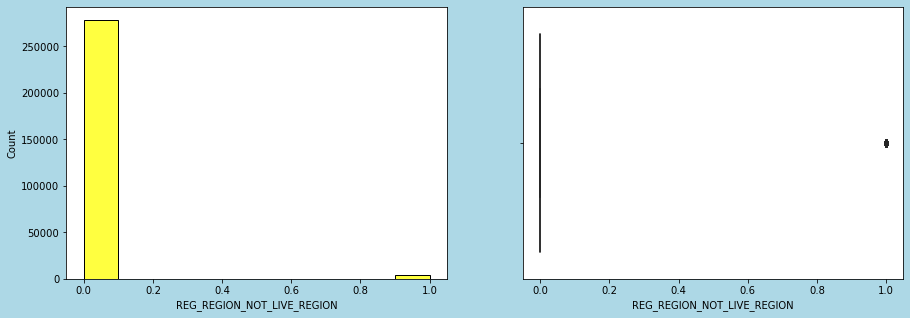

                                         Distribution of  REG_REGION_NOT_WORK_REGION


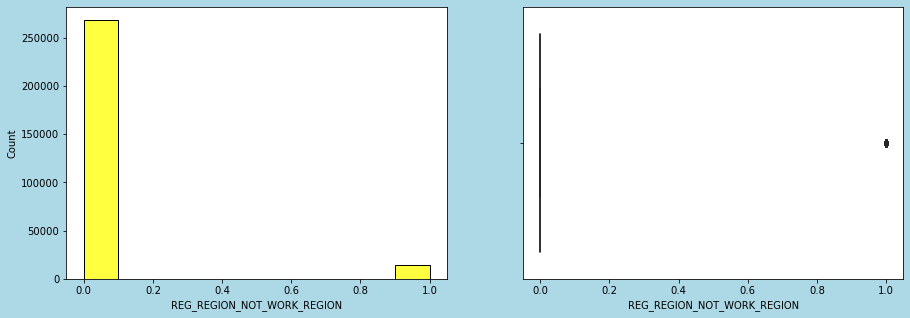

                                         Distribution of  LIVE_REGION_NOT_WORK_REGION


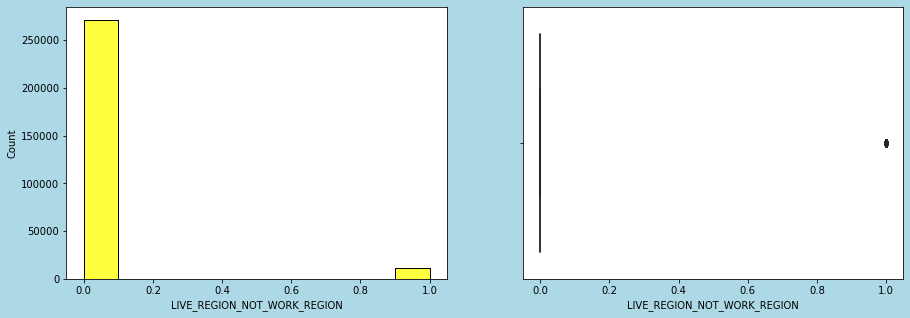

                                         Distribution of  REG_CITY_NOT_LIVE_CITY


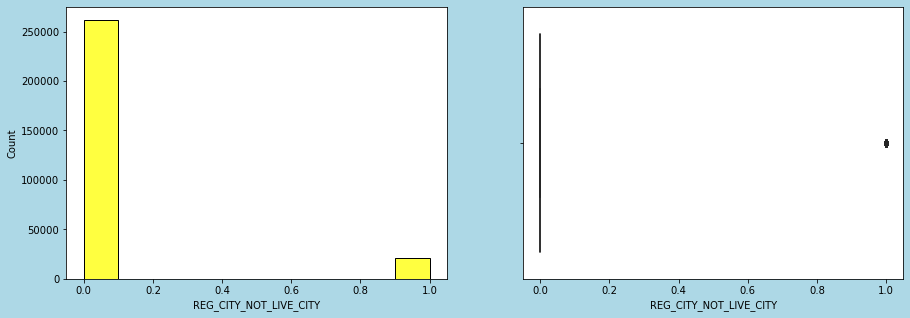

                                         Distribution of  REG_CITY_NOT_WORK_CITY


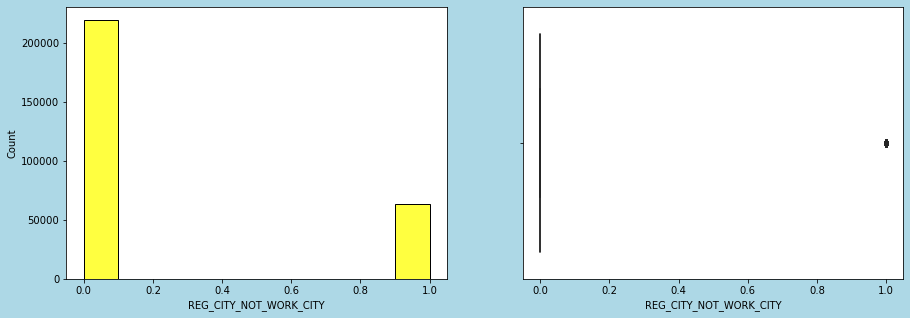

                                         Distribution of  LIVE_CITY_NOT_WORK_CITY


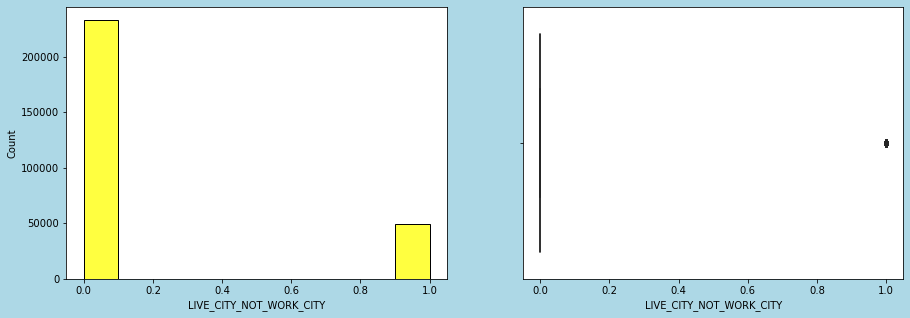

In [31]:
target0_num=target0.select_dtypes(include=[np.number])
target0_num.shape

for col in target0_num:
    plt.figure(figsize=(15,5),facecolor='lightblue')
    print('                                        ','Distribution of ',target0_num[col].name)
    plt.subplot(121)
    sns.histplot(x = target0_num[col], color = "yellow",bins=(10)) 
    plt.subplot(122)
    sns.boxplot(x = target0_num[col], color = "green") 
    plt.show()
    

### Concluding Remarks (For numerical variables if applicants pay on schedule):

1. The majority of the population counts one or two children; nonetheless, there are exceptions.
 
2. The majority of amt_annunity falls between 16000 and 34000.

3. 75% of DAYS_REGISTRATION have been completed in the range of 2000–7550 days.

## 6. Univariate analysis of categorical column for TARGET=0 (Applicants making payments on time)

                                     Distribution of  NAME_CONTRACT_TYPE


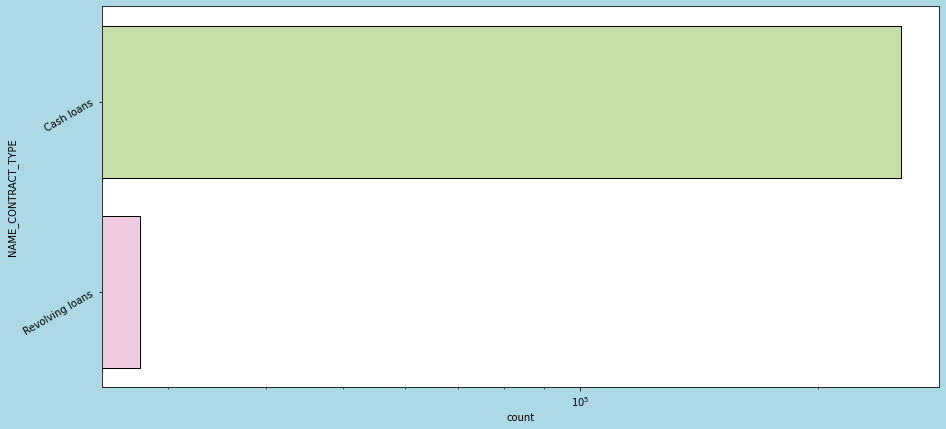

                                     Distribution of  CODE_GENDER


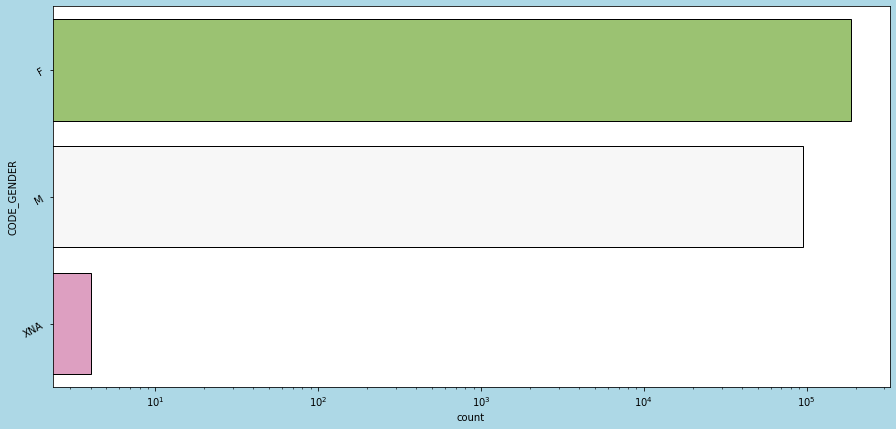

                                     Distribution of  FLAG_OWN_CAR


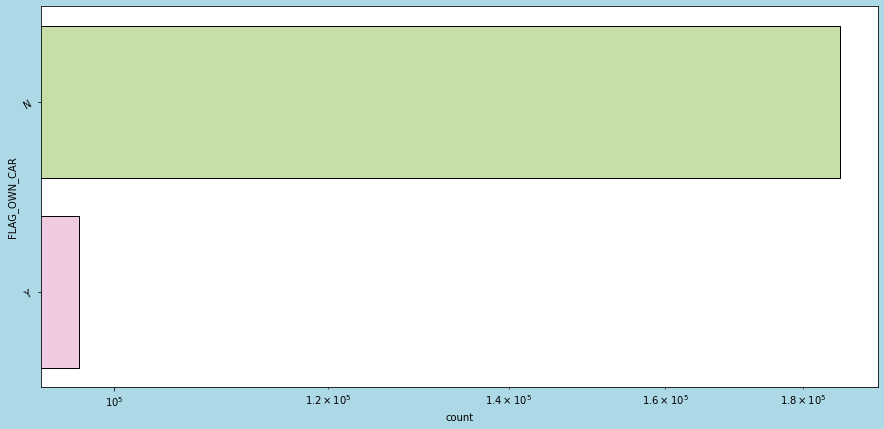

                                     Distribution of  FLAG_OWN_REALTY


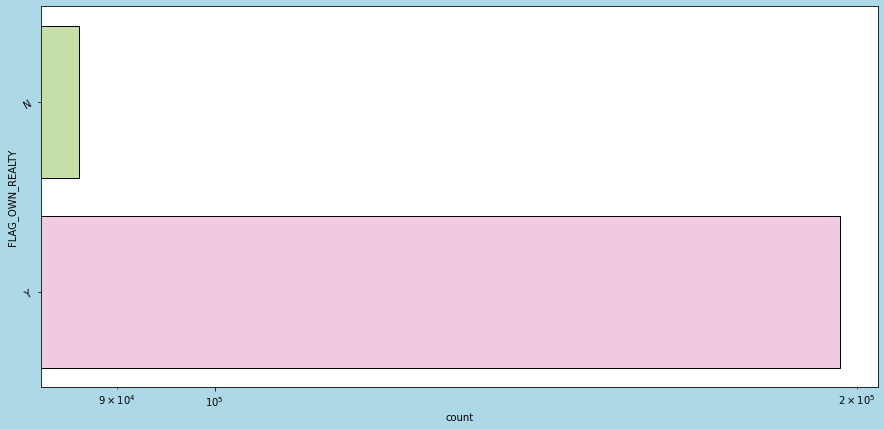

                                     Distribution of  NAME_TYPE_SUITE


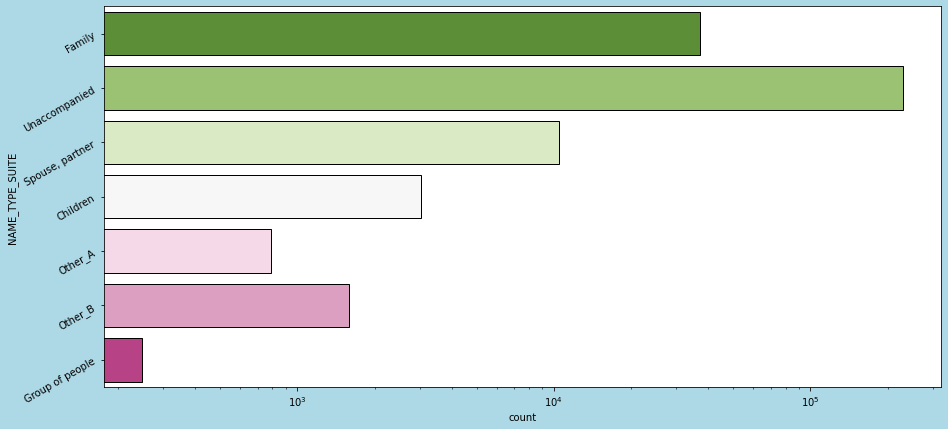

                                     Distribution of  NAME_INCOME_TYPE


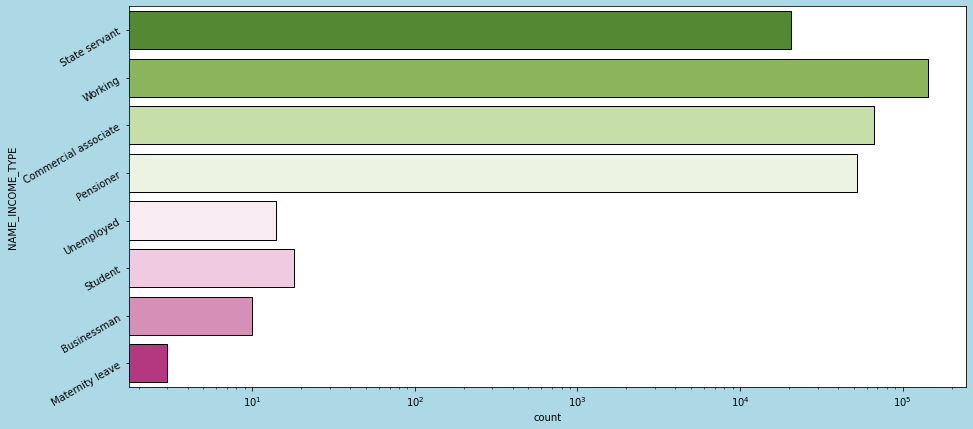

                                     Distribution of  NAME_EDUCATION_TYPE


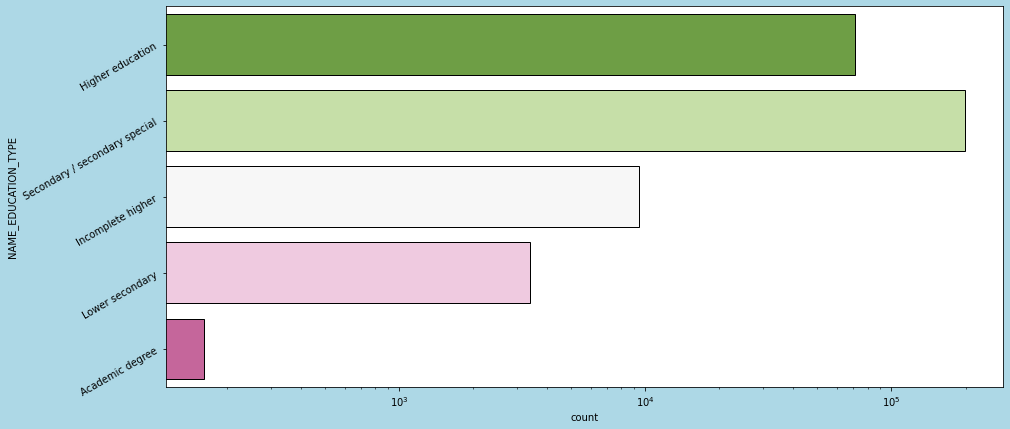

                                     Distribution of  NAME_FAMILY_STATUS


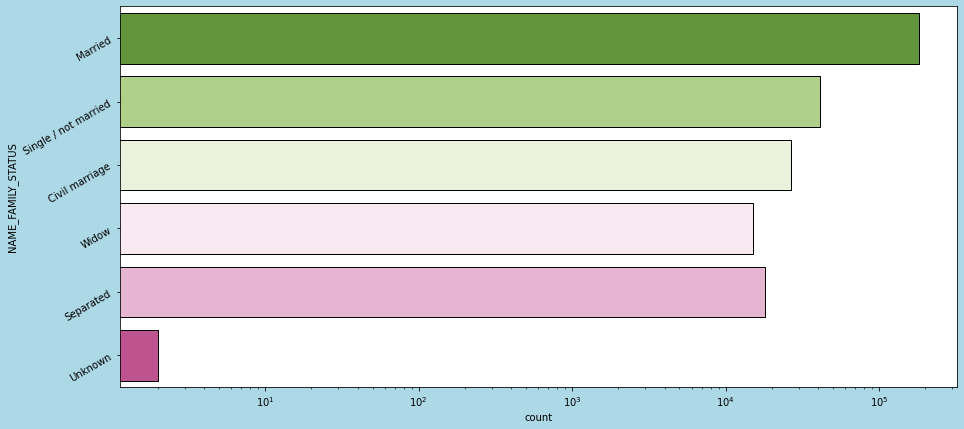

                                     Distribution of  NAME_HOUSING_TYPE


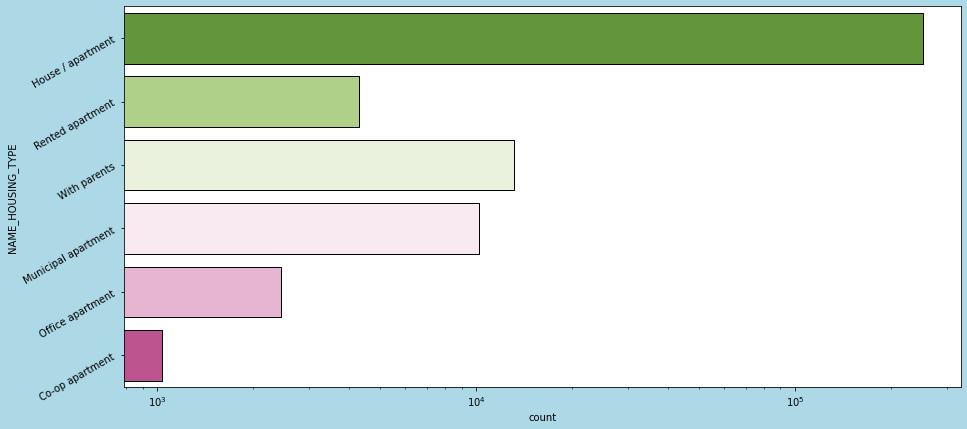

                                     Distribution of  OCCUPATION_TYPE


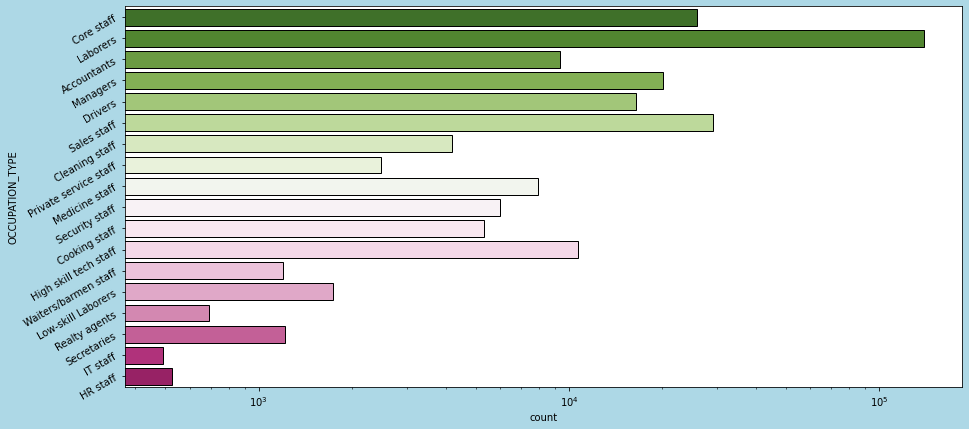

                                     Distribution of  WEEKDAY_APPR_PROCESS_START


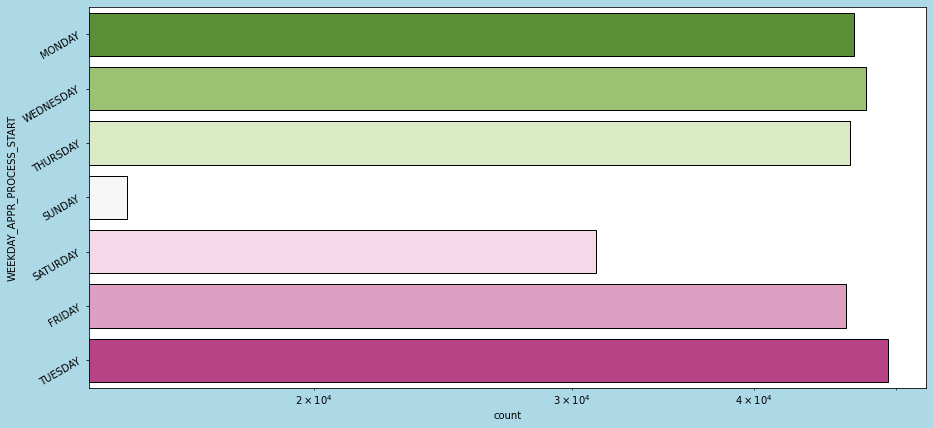

                                     Distribution of  ORGANIZATION_TYPE


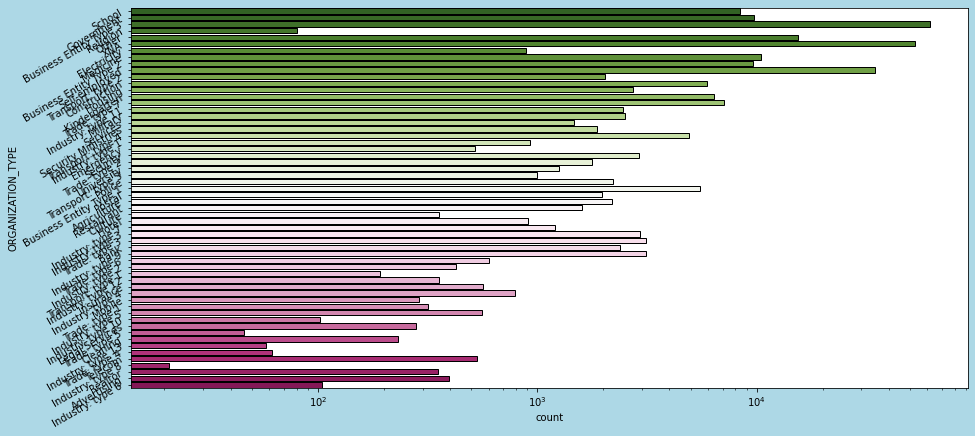

In [32]:
target0_cat=target0.select_dtypes(exclude=[np.number])

for col in target0_cat:
    plt.figure(figsize=(15,7),facecolor='lightblue')
    print('                                    ','Distribution of ',target0_cat[col].name)
    sns.countplot(y=target0_cat[col],ec='black',palette='PiYG_r')
    plt.xscale('log')
    plt.yticks(rotation='30')
    plt.show()
    

### Conclusion (For categorical columns in the Univariate analysis for individuals who pay on time):

1. More female members (66%) than male members (33%), applied for loans.

2. Compared to cash loans, revolving loans (30.21%) are lower.
 
3. There are more individuals 64% married.

4. While some persons have low NAME_TYPE_SUITE, more people have unaccompanied NAME_TYPE_SUITE (81%).

5. 21% of the population is a Business Entity Type 3 ORGANIZATION_TYPE.

6. 66% of individuals do not own an automobile.34% of people own an automobile.

8. 50.78% of individuals are employed in some capacity.

9. 89% of people live in houses or apartments.

10. More people—69% of them—own real estate.


## 7. Univariate analysis of numerical column for TARGET=1 (Applicants not making payments on time)

                                         Distribution of  SK_ID_CURR


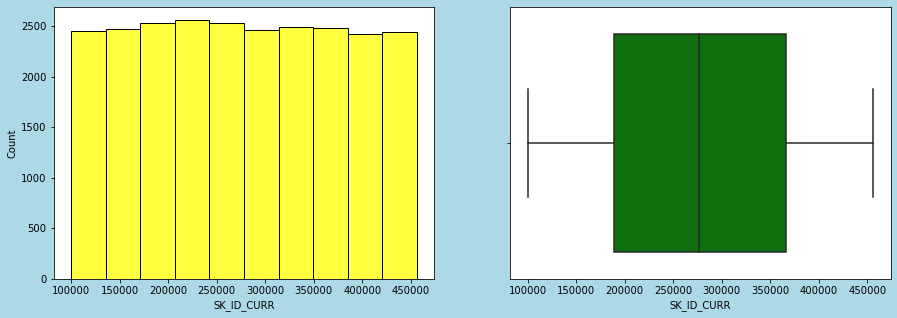

                                         Distribution of  TARGET


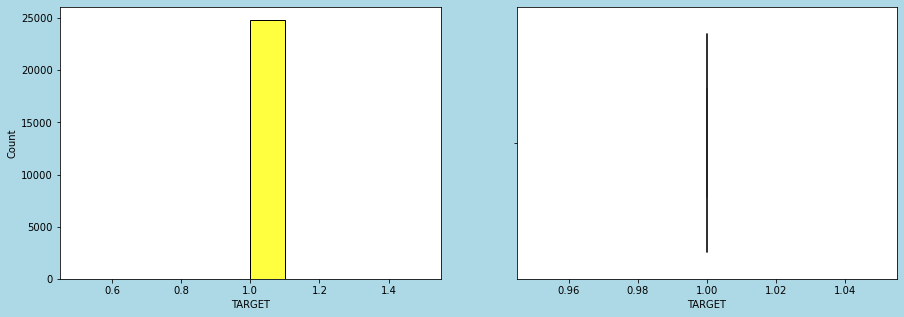

                                         Distribution of  CNT_CHILDREN


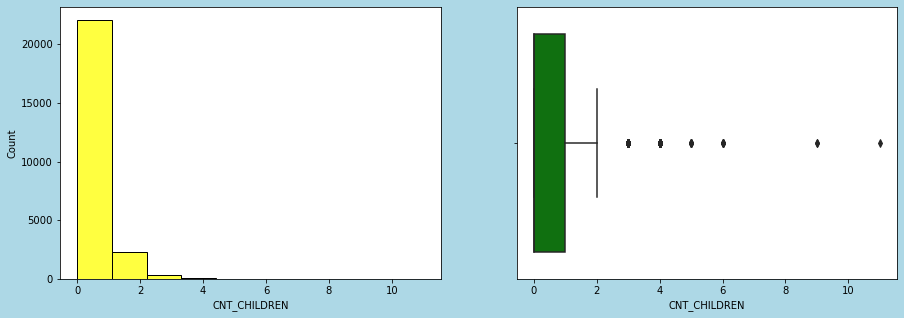

                                         Distribution of  AMT_INCOME_TOTAL


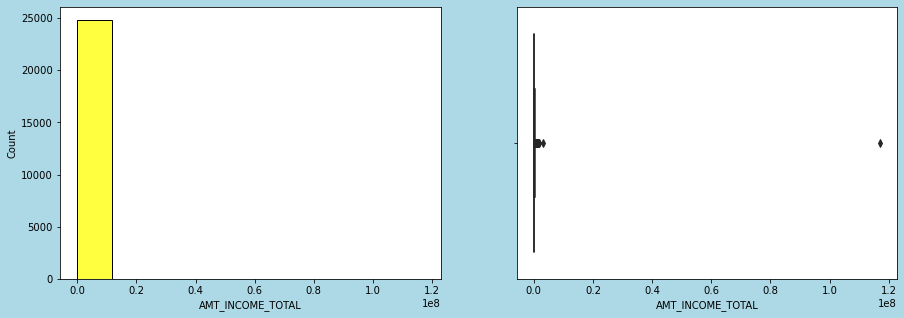

                                         Distribution of  AMT_CREDIT


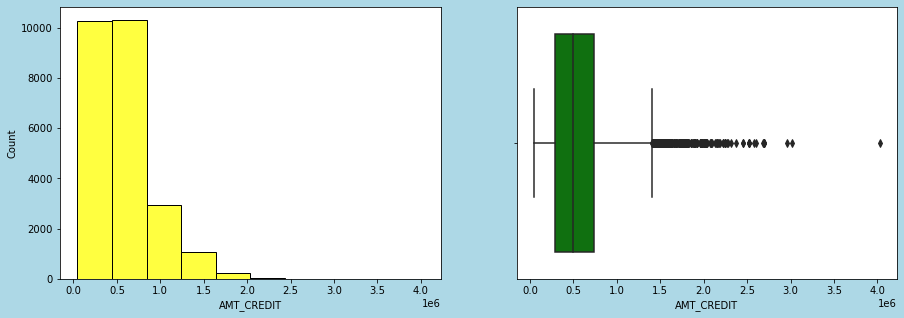

                                         Distribution of  AMT_ANNUITY


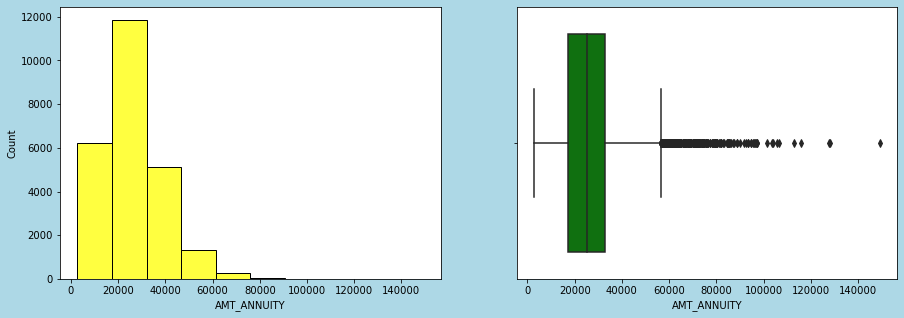

                                         Distribution of  AMT_GOODS_PRICE


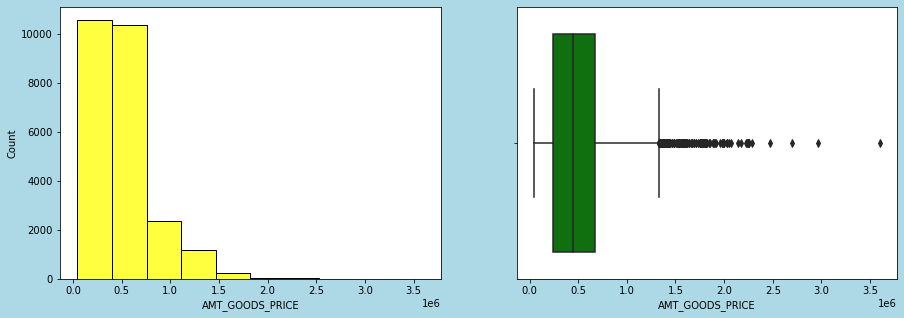

                                         Distribution of  REGION_POPULATION_RELATIVE


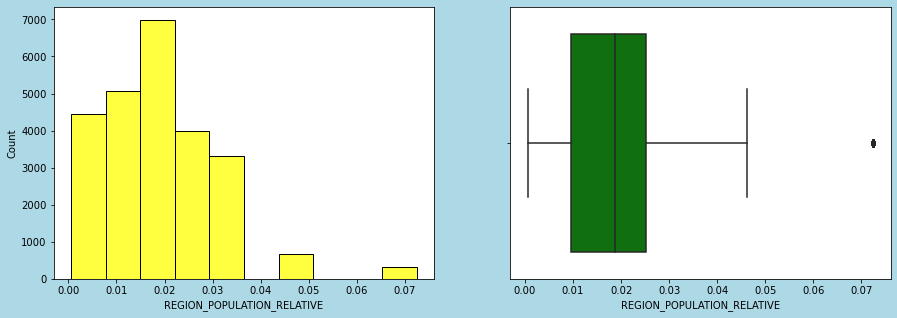

                                         Distribution of  DAYS_BIRTH


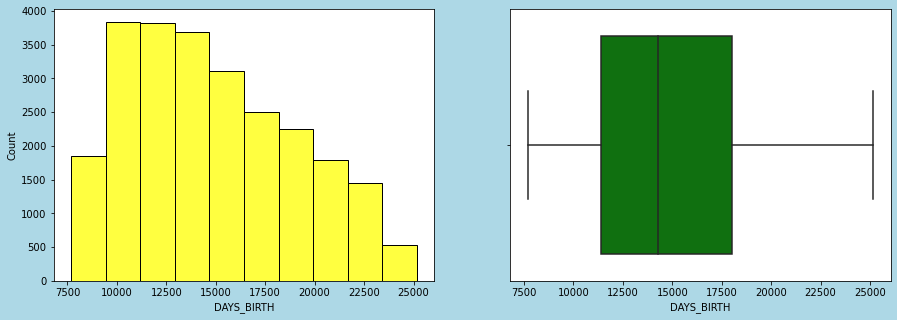

                                         Distribution of  DAYS_EMPLOYED


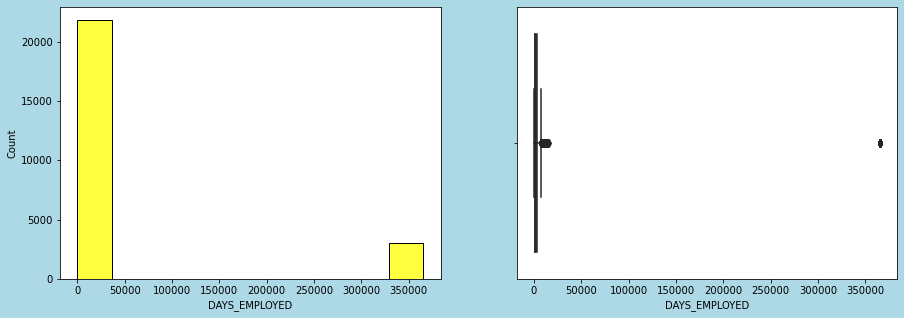

                                         Distribution of  DAYS_REGISTRATION


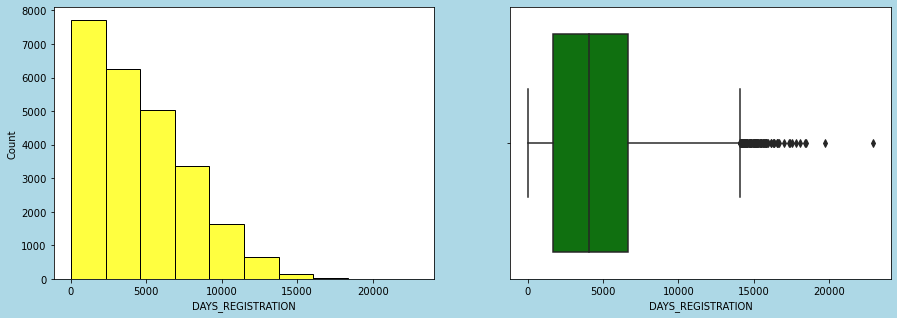

                                         Distribution of  DAYS_ID_PUBLISH


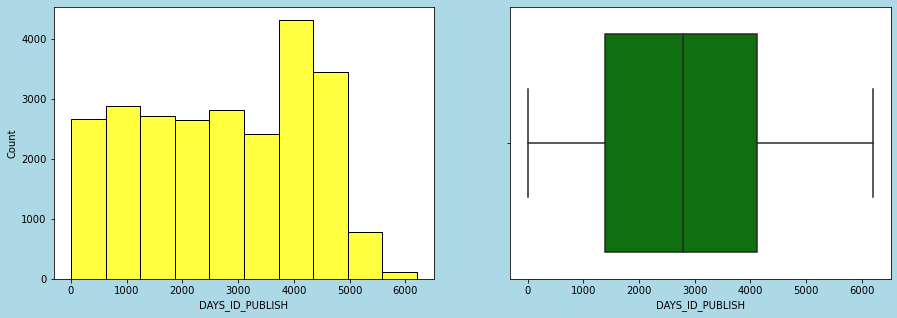

                                         Distribution of  CNT_FAM_MEMBERS


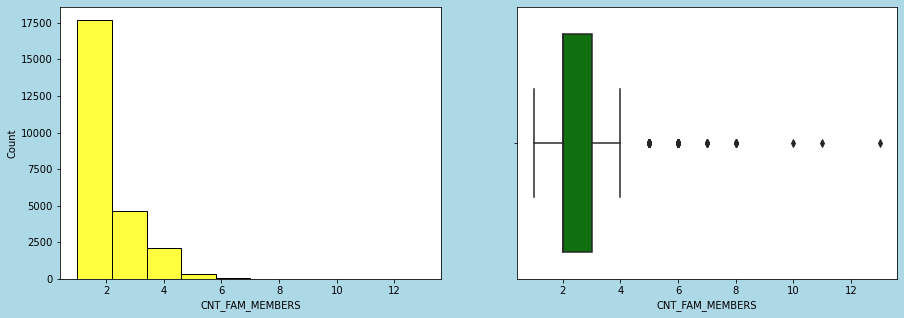

                                         Distribution of  REGION_RATING_CLIENT


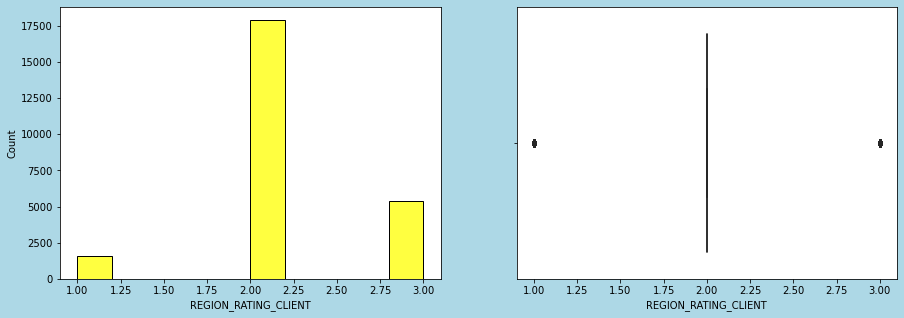

                                         Distribution of  REGION_RATING_CLIENT_W_CITY


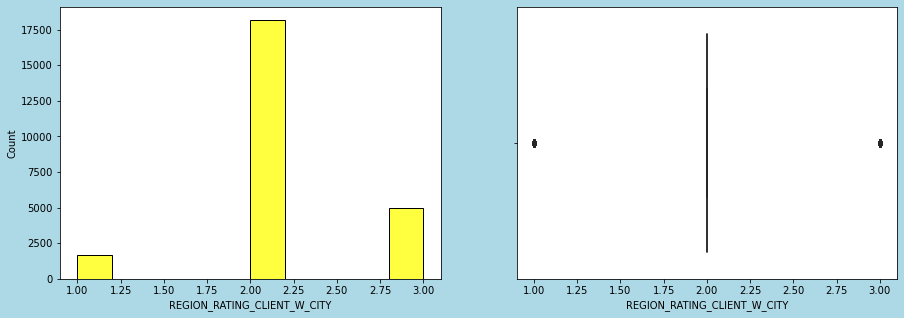

                                         Distribution of  HOUR_APPR_PROCESS_START


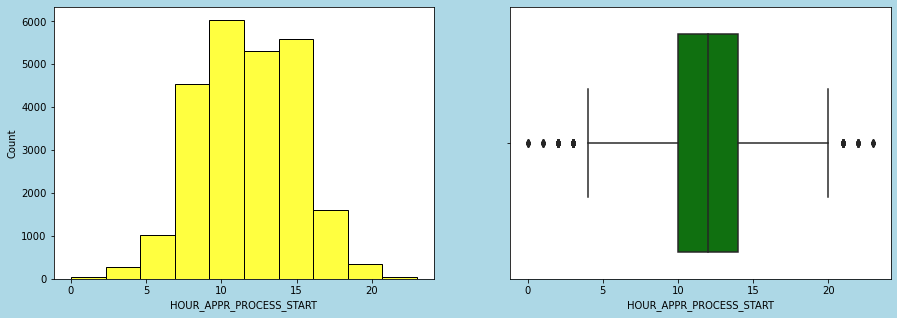

                                         Distribution of  REG_REGION_NOT_LIVE_REGION


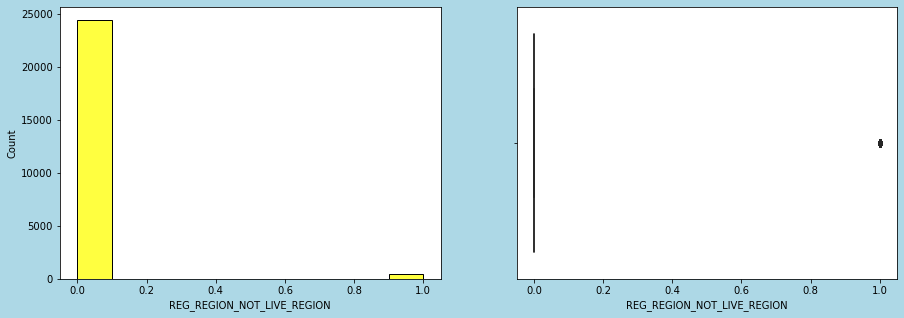

                                         Distribution of  REG_REGION_NOT_WORK_REGION


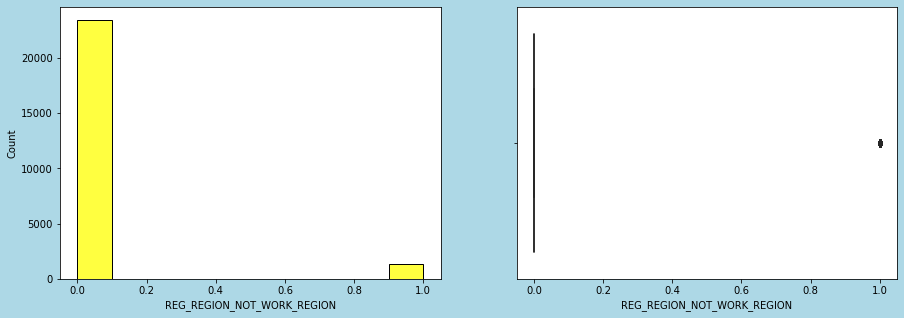

                                         Distribution of  LIVE_REGION_NOT_WORK_REGION


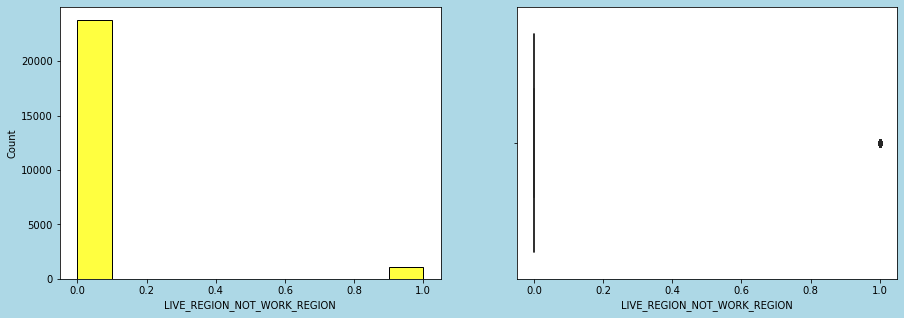

                                         Distribution of  REG_CITY_NOT_LIVE_CITY


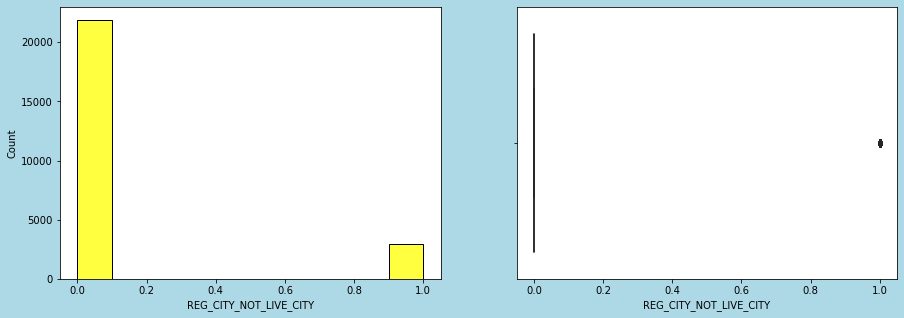

                                         Distribution of  REG_CITY_NOT_WORK_CITY


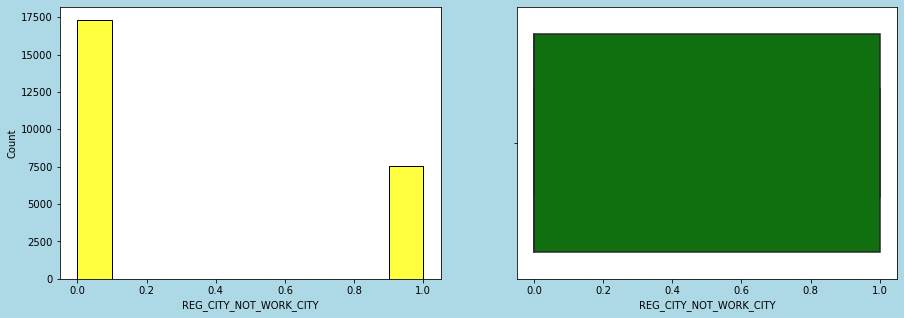

                                         Distribution of  LIVE_CITY_NOT_WORK_CITY


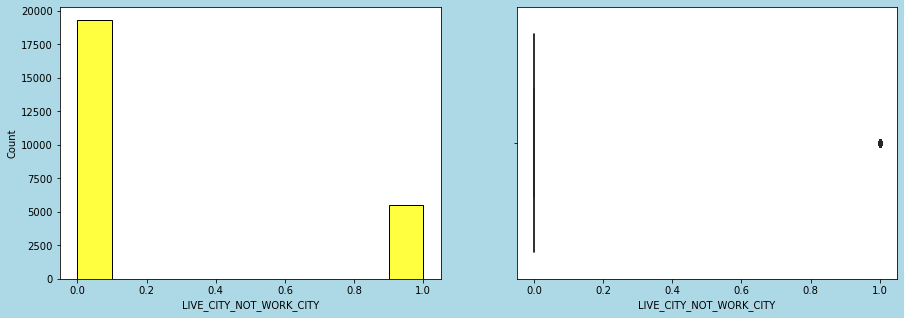

In [33]:
target1_num=target1.select_dtypes(include=[np.number])

for col in target1_num:
    plt.figure(figsize=(15,5),facecolor='lightblue')
    print('                                        ','Distribution of ',target1_num[col].name)
    plt.subplot(121)
    sns.histplot(x = target1_num[col], color = "yellow",bins=(10)) 
    plt.subplot(122)
    sns.boxplot(x = target1_num[col], color = "green") 
    plt.show()

### Conclusion (For Continuous Columns that Don't Pay on Time):

1. The majority of the population counts one or two children; nonetheless, there are exceptions.

2. The average amount credit for all data sets is 3.6.026483e+05.

3. The mean income amount for the entire data set is 2.1.690777e+05.

4. 50 percent of the population has worked 6000 days.

5. The majority of amt_annunity falls between 16000 and 34000.

6. The majority of DAYS_ID_PUBLISH have completed between 1700 and 3295 days.

7. Around 1700–4300 days have been completed for the majority of DAYS_REGISTRATION.
 
8. There are just 3 members in 8.75% of CNT_FAM_MEMBERS.






## 8. Univariate analysis of categorical column for TARGET=1 (Applicants not making payments on time)

                                     Distribution of  NAME_CONTRACT_TYPE


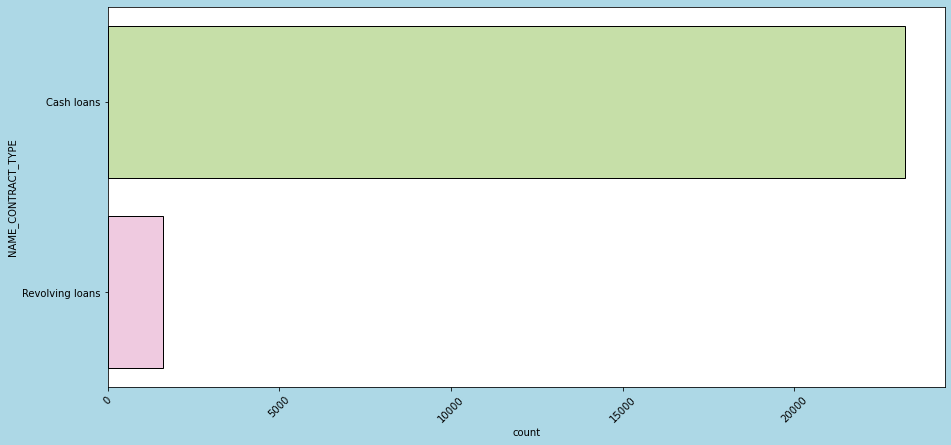

                                     Distribution of  CODE_GENDER


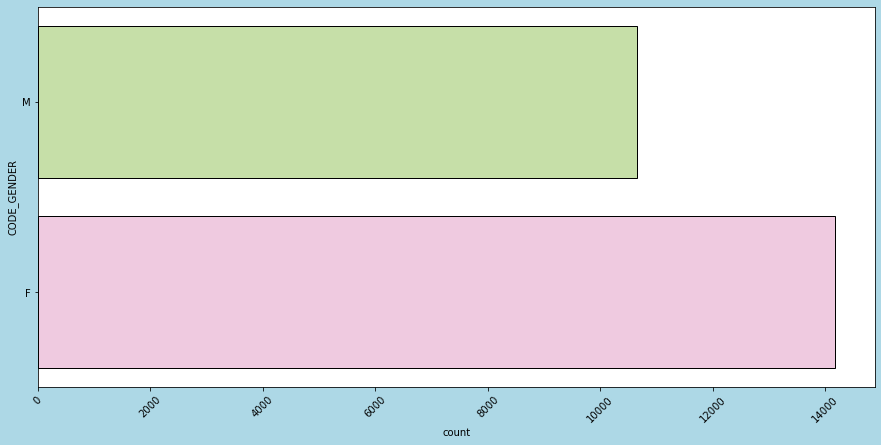

                                     Distribution of  FLAG_OWN_CAR


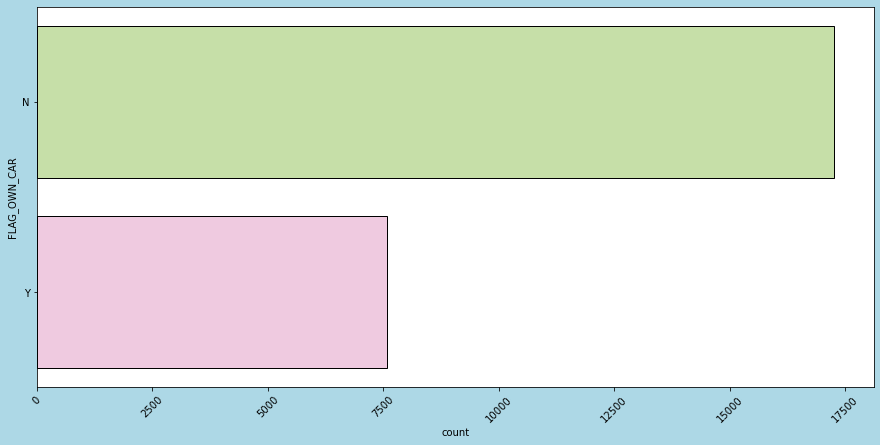

                                     Distribution of  FLAG_OWN_REALTY


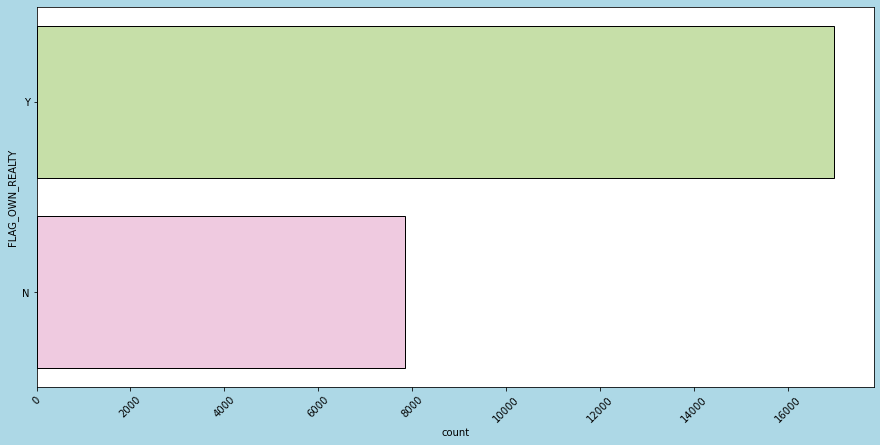

                                     Distribution of  NAME_TYPE_SUITE


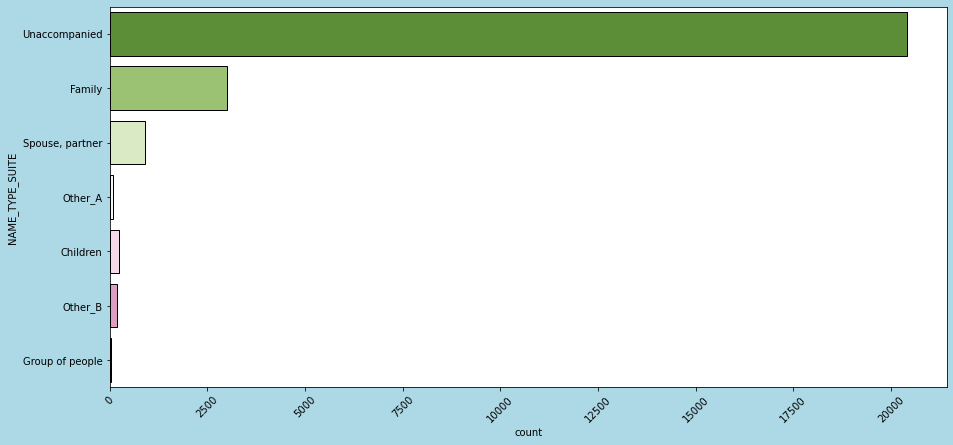

                                     Distribution of  NAME_INCOME_TYPE


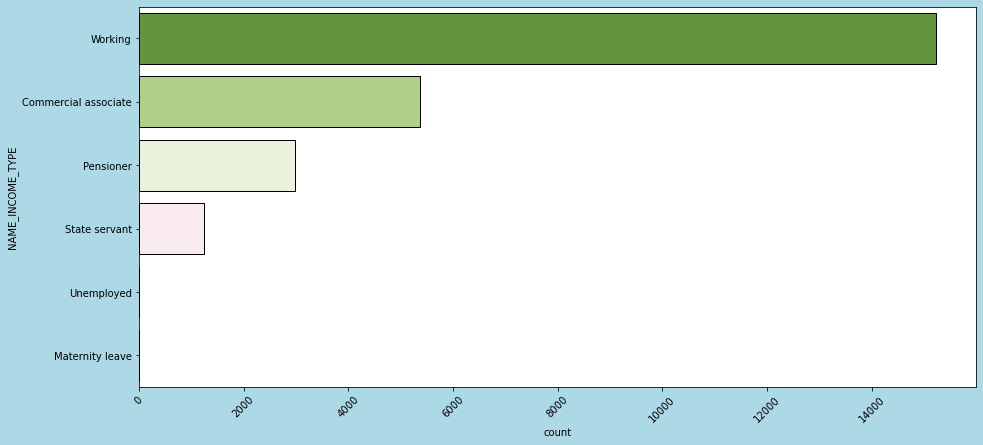

                                     Distribution of  NAME_EDUCATION_TYPE


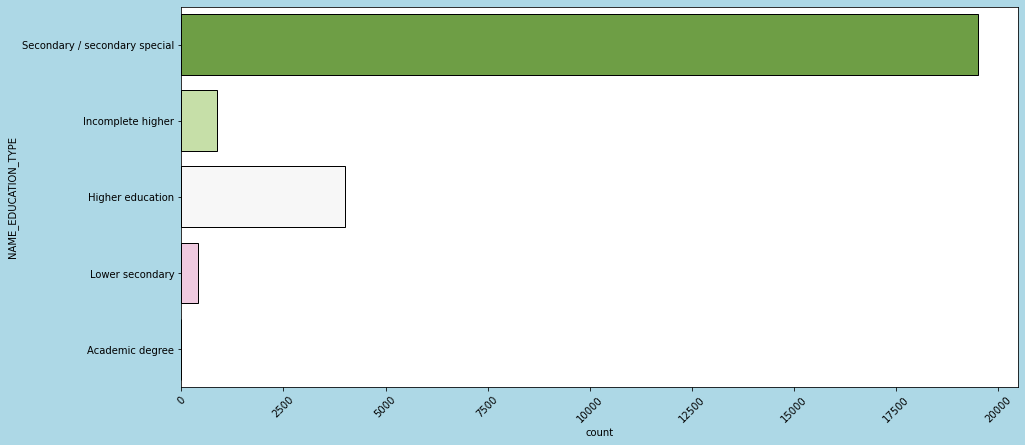

                                     Distribution of  NAME_FAMILY_STATUS


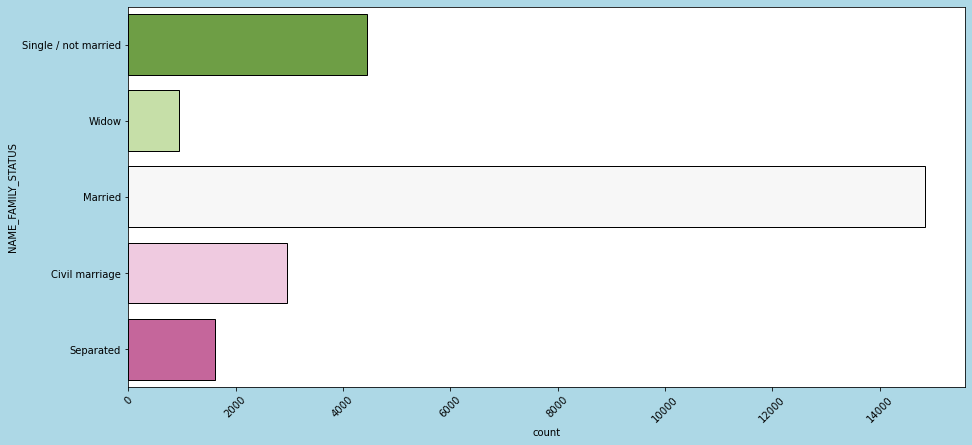

                                     Distribution of  NAME_HOUSING_TYPE


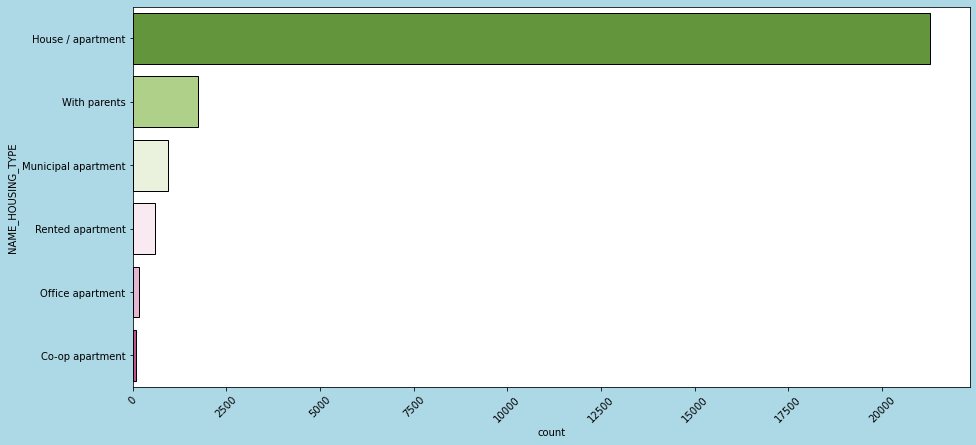

                                     Distribution of  OCCUPATION_TYPE


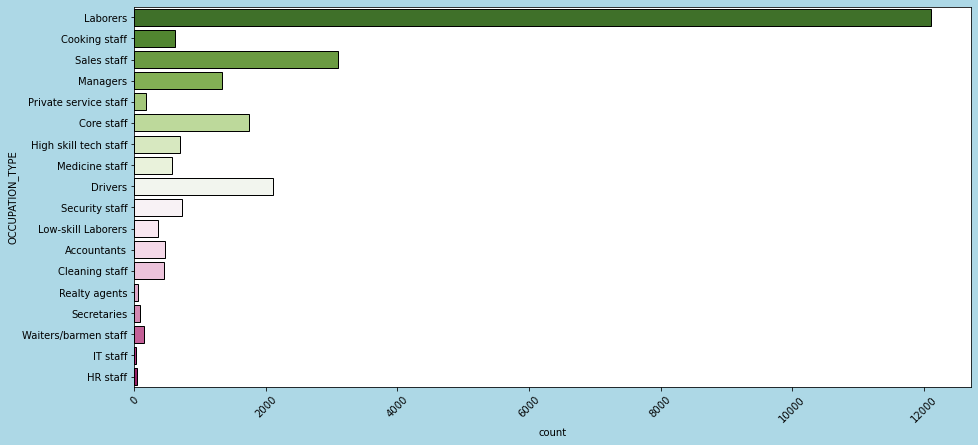

                                     Distribution of  WEEKDAY_APPR_PROCESS_START


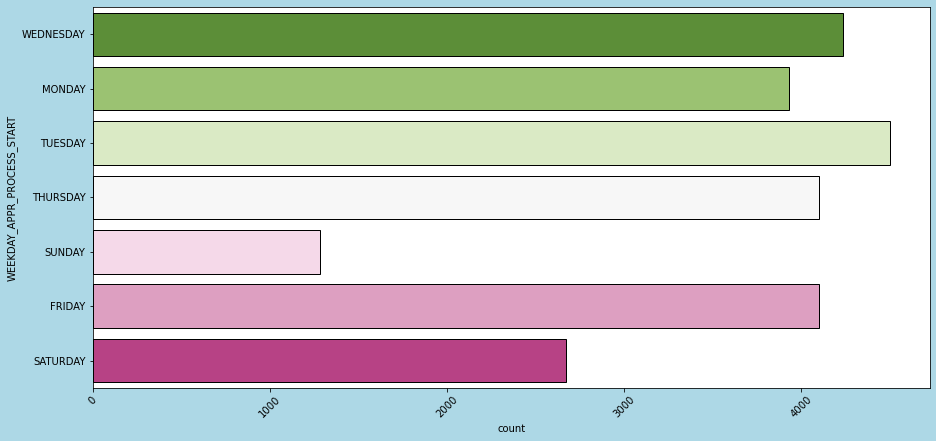

                                     Distribution of  ORGANIZATION_TYPE


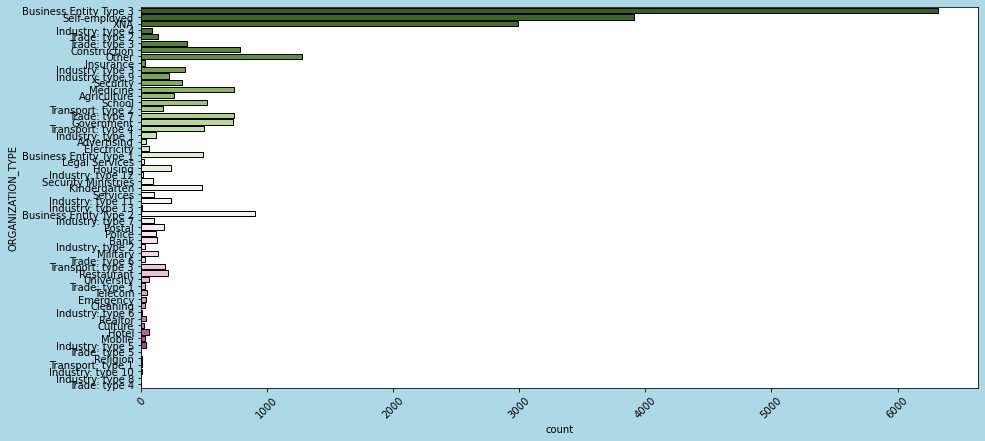

In [34]:
target1_cat=target1.select_dtypes(exclude=[np.number])

for col in target1_cat:
    plt.figure(figsize=(15,7),facecolor='lightblue')
    print('                                    ','Distribution of ',target1_cat[col].name)
    sns.countplot(y=target1_cat[col],ec='black',palette='PiYG_r')
    plt.xticks(rotation=45)
    plt.show()

### Conclusion (For Univariate analysis categorical columns for people making payment not on time ):
1. Specialized secondary education In 7.76% of occurrences, NAME_EDUCATION_TYPE is present.

2. Of all people, 66% do not own a car.But just 30% of people own a car. 

3. Among the members, more women (57%) than men (42%), submitted loan applications.

4. A greater proportion of people—68%—own real estate than do not, at 31%.

5. Of all people, 85% reside in homes or flats. 

6. The ratio of revolving loans is smaller than that of cash loans (6.46%).

7. 63.78% of people in the population are employed.


## 9. Bivariate Analysis for categorical columns

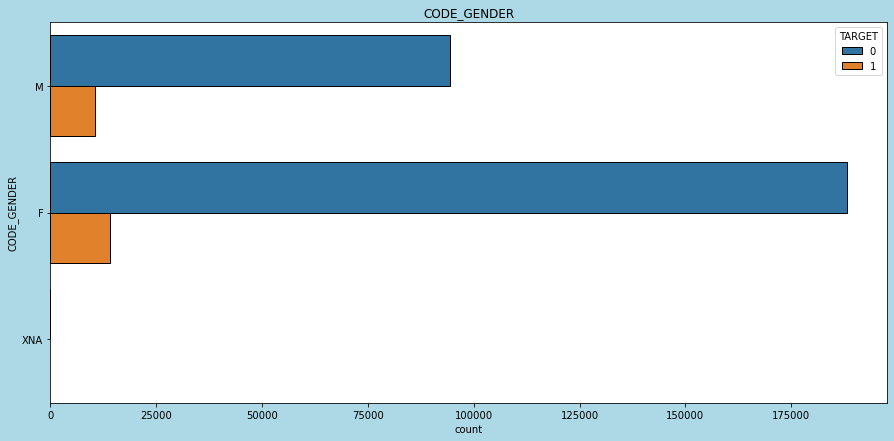

In [35]:
plt.figure(figsize=(15,7),facecolor='lightblue')
sns.countplot(data=d,y=d.CODE_GENDER,hue=d['TARGET'],ec='black')
plt.title('CODE_GENDER')
plt.show()

### Conclusion:
1. The number of female loan applicants has increased.

2. Men are more likely than women to fail on their loans.

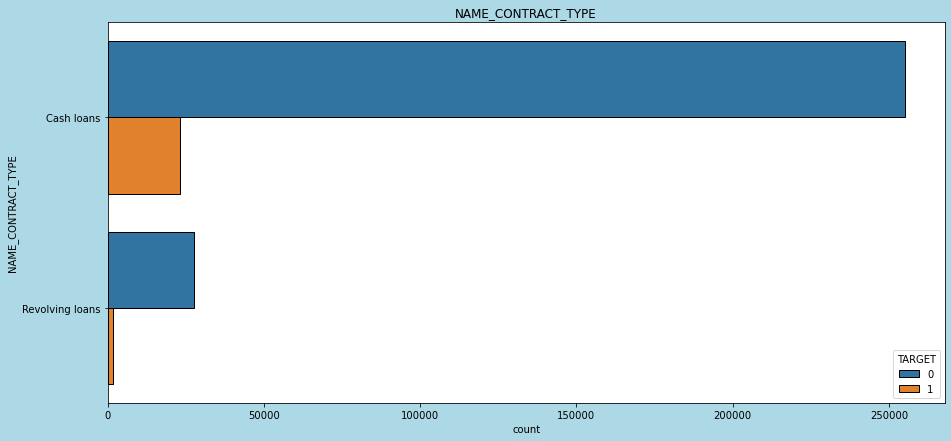

In [36]:
plt.figure(figsize=(15,7),facecolor='lightblue')
sns.countplot(data=d,y=d.NAME_CONTRACT_TYPE,hue=d['TARGET'],ec='black')
plt.title('NAME_CONTRACT_TYPE')
plt.show()

### Conclusion:
1. Compared to revolving loans, more consumers have applied for cash loan contracts.

2. There is a greater likelihood of default for borrowers with contracts for cash loans. 

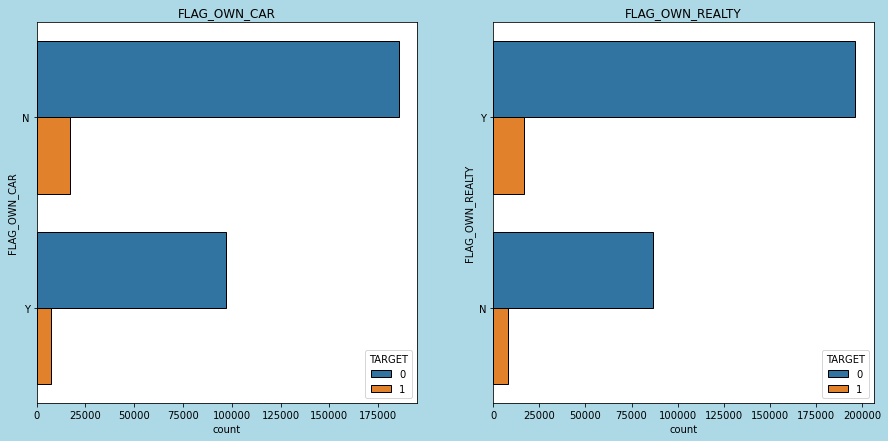

In [37]:
plt.figure(figsize=(15,7),facecolor='lightblue')
plt.subplot(121)
sns.countplot(data=d,y=d.FLAG_OWN_CAR,hue=d['TARGET'],ec='black')
plt.title('FLAG_OWN_CAR')
plt.subplot(122)
plt.title('FLAG_OWN_REALTY')
sns.countplot(data=d,y=d.FLAG_OWN_REALTY,hue=d['TARGET'],ec='black')
plt.show()

### Conclusion:
1. Individuals who own property have paid more on time.

2. More loan applications have come from people without cars.

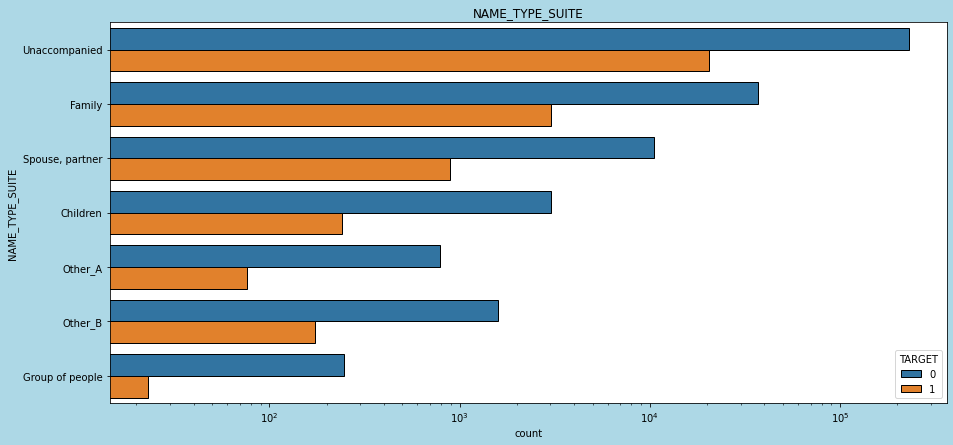

In [38]:
plt.figure(figsize=(15,7),facecolor='lightblue')
sns.countplot(data=d,y=d.NAME_TYPE_SUITE,hue=d['TARGET'],ec='black')
plt.xscale('log')
plt.title('NAME_TYPE_SUITE')
plt.show()

### Conclusion:
1. The likelihood of default is very high for those in the Other_B type suite.

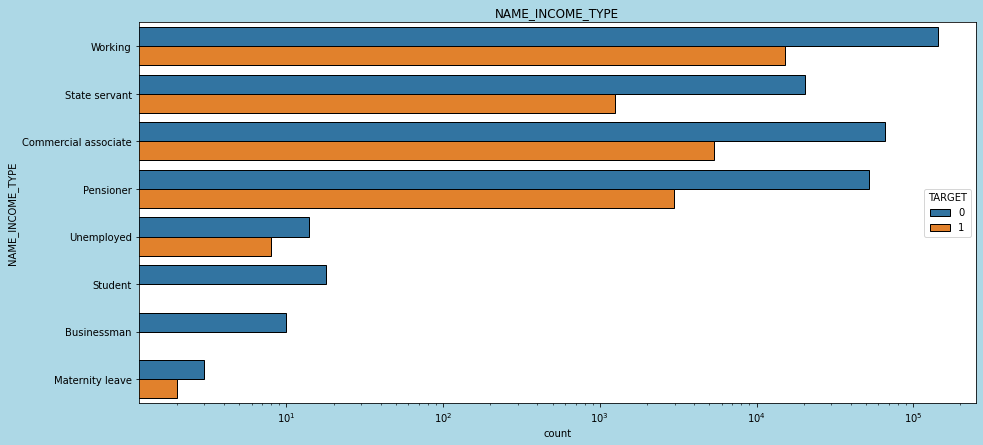

In [39]:
plt.figure(figsize=(15,7),facecolor='lightblue')
sns.countplot(data=d,y=d.NAME_INCOME_TYPE,hue=d['TARGET'],ec='black')
plt.title('NAME_INCOME_TYPE')
plt.xscale('log')
plt.show()

### Conclusion :
1. Those with higher income types who are unemployed are more likely to default.

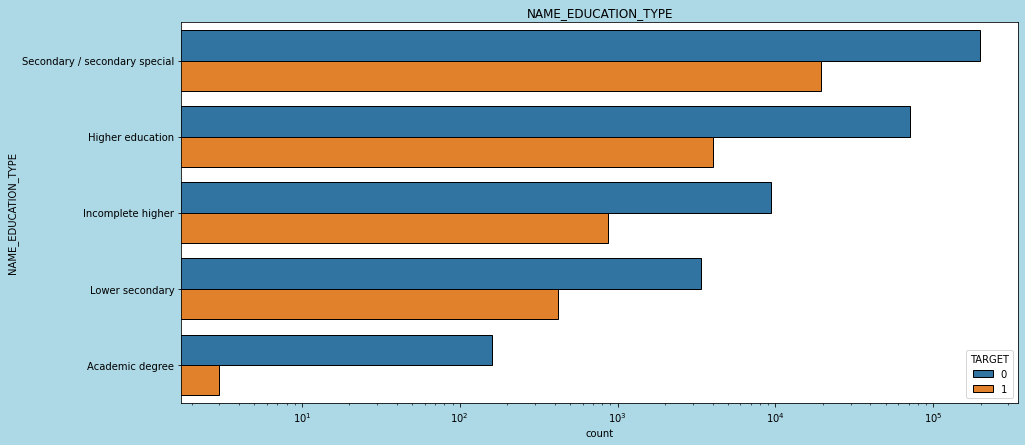

In [40]:
plt.figure(figsize=(15,7),facecolor='lightblue')
sns.countplot(data=d,y=d.NAME_EDUCATION_TYPE,hue=d['TARGET'],ec='black')
plt.title('NAME_EDUCATION_TYPE')
plt.xscale('log')
plt.show()

### Conclusion :
1. Individuals that fit the NAME_EDUCATION_TYPE category There is a greater chance of default in lower secondary.

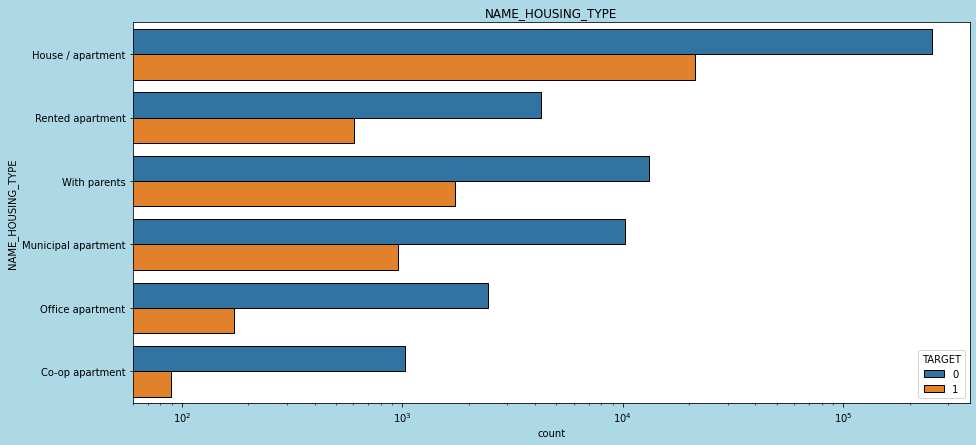

In [41]:
plt.figure(figsize=(15,7),facecolor='lightblue')
sns.countplot(data=d,y=d.NAME_HOUSING_TYPE,hue=d['TARGET'],ec='black')
plt.title('NAME_HOUSING_TYPE')
plt.xscale('log')
plt.show()

### Conclusion:
1. Individuals who own a certain kind of housing Renters in apartments run a significant chance of defaulting.

2. Individuals who own a certain kind of housing With parents  have high risk to be defaulters.

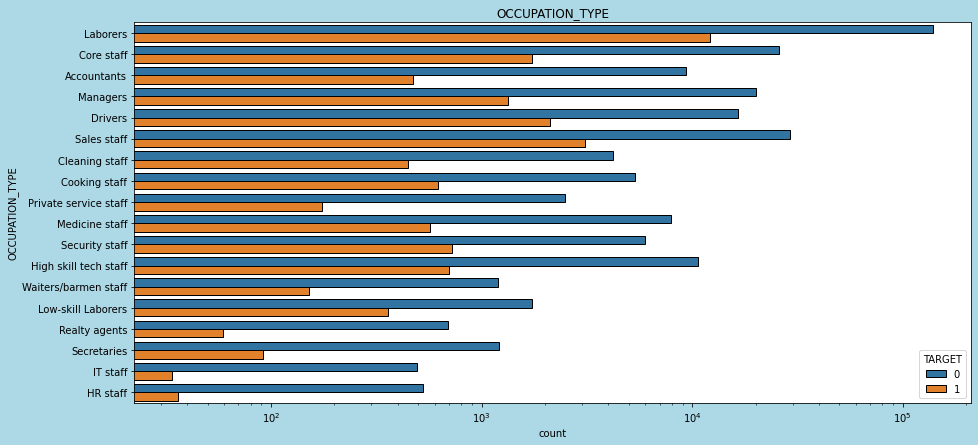

In [42]:
plt.figure(figsize=(15,7),facecolor='lightblue')
sns.countplot(data=d,y=d.OCCUPATION_TYPE,hue=d['TARGET'],ec='black')
plt.title('OCCUPATION_TYPE')
plt.xscale('log')
plt.show()

### Conclusion:
1. More individuals Approximately 20% of low-skill laborers are at significant risk of defaulting.

2. Security personnel and waiters/bartenders are at a significant risk of defaulting.

## 1. Data Understanding second Data set

### a. Reading data

In [43]:
# showing 3 top rows of data
df2.head(3)  

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [44]:
# shape of csv file
df2.shape

(1670214, 37)

In [45]:
# checking the data types 
df2.dtypes 

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

### b.Checking the missing values

In [46]:
# Checking the missing values
df2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [47]:
percent_missing_2 = df2.isnull().sum() * 100 / len(df1)
percent_missing_2

SK_ID_PREV                       0.000000
SK_ID_CURR                       0.000000
NAME_CONTRACT_TYPE               0.000000
AMT_ANNUITY                    121.047702
AMT_APPLICATION                  0.000000
AMT_CREDIT                       0.000325
AMT_DOWN_PAYMENT               291.320961
AMT_GOODS_PRICE                125.366247
WEEKDAY_APPR_PROCESS_START       0.000000
HOUR_APPR_PROCESS_START          0.000000
FLAG_LAST_APPL_PER_CONTRACT      0.000000
NFLAG_LAST_APPL_IN_DAY           0.000000
RATE_DOWN_PAYMENT              291.320961
RATE_INTEREST_PRIMARY          541.204380
RATE_INTEREST_PRIVILEGED       541.204380
NAME_CASH_LOAN_PURPOSE           0.000000
NAME_CONTRACT_STATUS             0.000000
DAYS_DECISION                    0.000000
NAME_PAYMENT_TYPE                0.000000
CODE_REJECT_REASON               0.000000
NAME_TYPE_SUITE                266.788830
NAME_CLIENT_TYPE                 0.000000
NAME_GOODS_CATEGORY              0.000000
NAME_PORTFOLIO                   0

In [48]:
#checking columns with more than 40% of missing values
len(percent_missing_2[percent_missing_2.values>40])
percent_missing_2=percent_missing_2[percent_missing_2.values>40]

### c. Removing column which has missing data more than 40 %


In [49]:
# Removing column which has missing data more than 40 %
df2.drop(percent_missing_2.index, axis=1, inplace = True)
df2.shape

(1670214, 23)

In [50]:
df2.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       1
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [51]:
# Filling null values in PRODUCT_COMBINATION column 
mode3=df2.PRODUCT_COMBINATION.mode()[0]
print('Mode3=',mode3)
df2.PRODUCT_COMBINATION.fillna(mode3,inplace=True)

Mode3= Cash


# 2. Merging both data sets.

In [52]:
# Joining both data set using inner join
d2=d.merge(df2, on = 'SK_ID_CURR', how = 'inner')

In [53]:
d2.shape

(1413701, 56)

In [54]:
d2.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START_x    0
HOUR_APPR_PROCESS_START_x       0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NO

In [55]:
# Considering the required columns
main=d2[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER','PRODUCT_COMBINATION','NAME_GOODS_CATEGORY','NAME_PRODUCT_TYPE','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT_x','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS','CODE_REJECT_REASON', 'REGION_RATING_CLIENT']]

In [56]:
main.shape

(1413701, 29)

### d. Separating in categorical and numerical columns

In [57]:
main_numerical=main.select_dtypes(include=[np.number])
print(main_numerical.shape)
main_categorical=main.select_dtypes(exclude=[np.number])
print(main_categorical.shape)

(1413701, 13)
(1413701, 16)


### e.Separating on the basis on target column.

In [58]:
target0=main[main.TARGET==0]
target1=main[main.TARGET==1]

### f. Univariate and Bivariate analysis

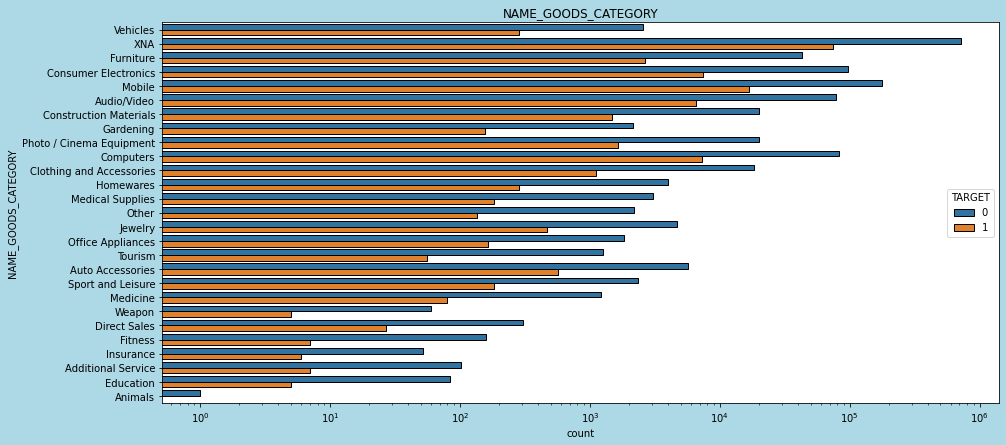

In [59]:
plt.figure(figsize=(15,7),facecolor='lightblue')
sns.countplot(data=main,y=main.NAME_GOODS_CATEGORY,ec='black',hue=main['TARGET'])
plt.xscale('log')
plt.title('NAME_GOODS_CATEGORY')
plt.show()

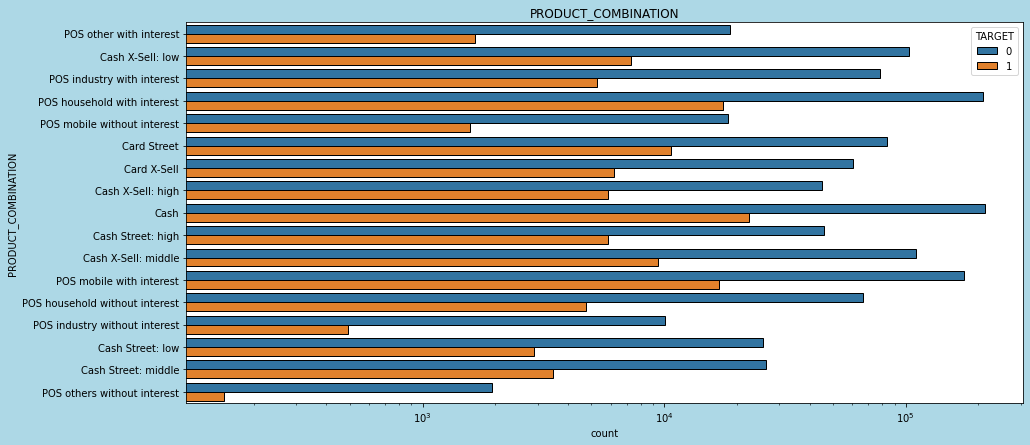

In [60]:
plt.figure(figsize=(15,7),facecolor='lightblue')
sns.countplot(data=main,y=main.PRODUCT_COMBINATION,ec='black',hue=main['TARGET'])
plt.xscale('log')
plt.title('PRODUCT_COMBINATION')
plt.show()

### Conclusion :
1. Cash, Card X-Sell, Card Street Cash Street: the product combinations with the highest default rates are also high.
2. The middle product combination has the highest default rate (13% Cash Street).
 

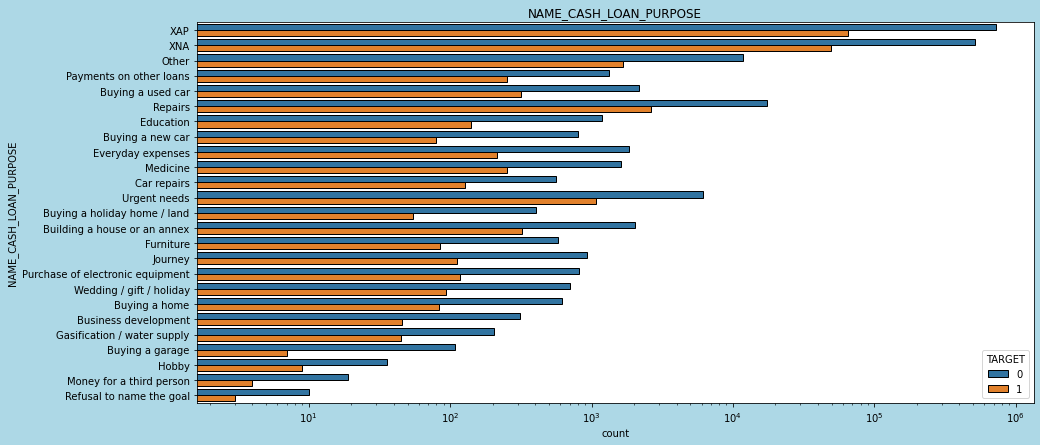

In [61]:
plt.figure(figsize=(15,7),facecolor='lightblue')
sns.countplot(data=main,y=main.NAME_CASH_LOAN_PURPOSE,ec='black',hue=main['TARGET'])
plt.xscale('log')
plt.title('NAME_CASH_LOAN_PURPOSE')
plt.show()

### Conclusion :
1. Thirty percent of borrowers  defaulters who refused to identify the objective.
2. A hobby, funds for a third party, loan repayments,gasification and water provision,Auto repairs could have a high default rate.

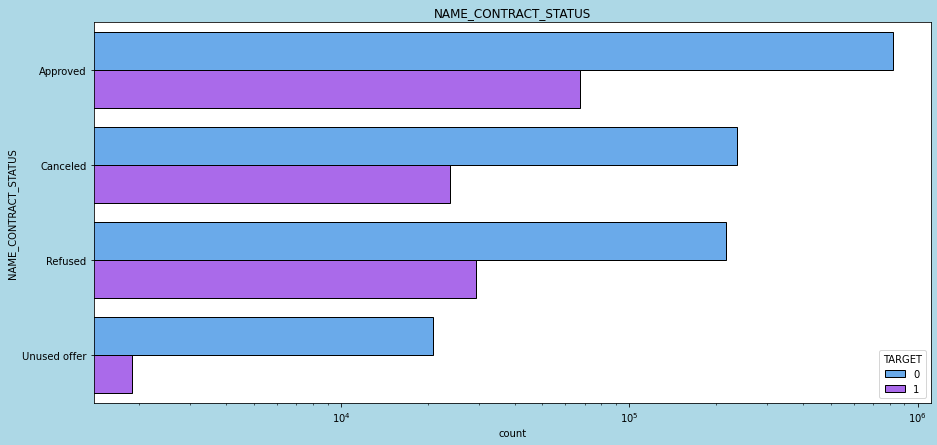

In [62]:
plt.figure(figsize=(15,7),facecolor='lightblue')
sns.countplot(data=main,y=main.NAME_CONTRACT_STATUS,hue=main['TARGET'],palette='cool',ec='black')
plt.xscale('log')
plt.title('NAME_CONTRACT_STATUS')
plt.show()

### Conclusion :
1. Thirteen percent of those who declined the contract could not make their payments on schedule.
2. Ten percent of contract cancellations had late payments.


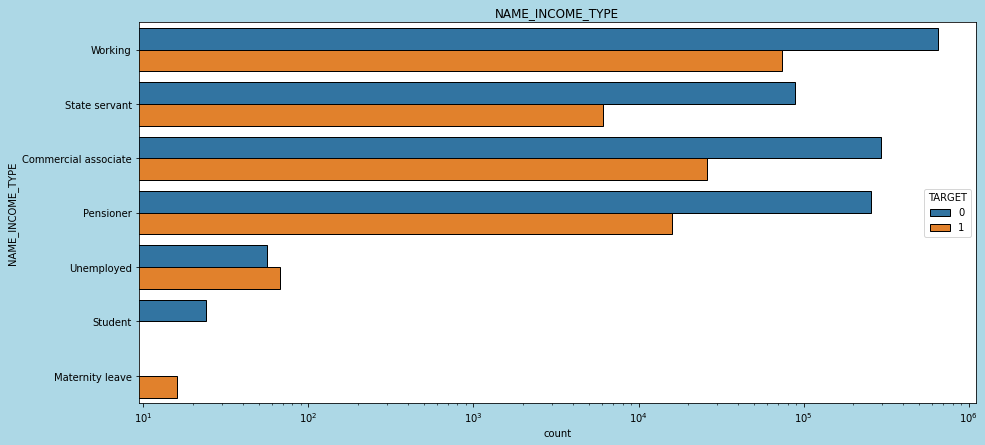

In [63]:
plt.figure(figsize=(15,7),facecolor='lightblue')
sns.countplot(data=main,y=main.NAME_INCOME_TYPE,ec='black',hue=main['TARGET'])
plt.xscale('log')
plt.title('NAME_INCOME_TYPE')
plt.show()

### Conclusion :
1. There are more working people,Approximately 10% of all working individuals experience difficulty with payments.
2. Eight percent of state employees have trouble making payments.

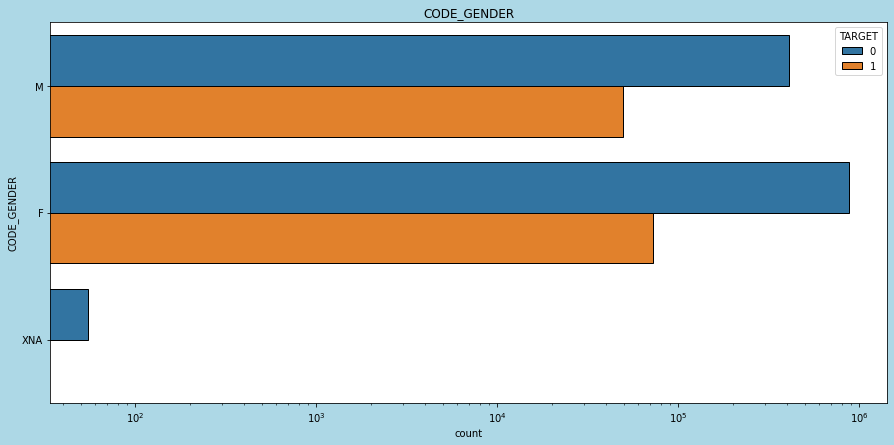

In [64]:
plt.figure(figsize=(15,7),facecolor='lightblue')
sns.countplot(data=main,y=main.CODE_GENDER,ec='black',hue=main['TARGET'])
plt.xscale('log')
plt.title('CODE_GENDER')
plt.show()

### Conclusion :
1. Women are better at getting paid than males are.
However, there are also more women who do not make their payments on schedule.

# Multivariate Analysis

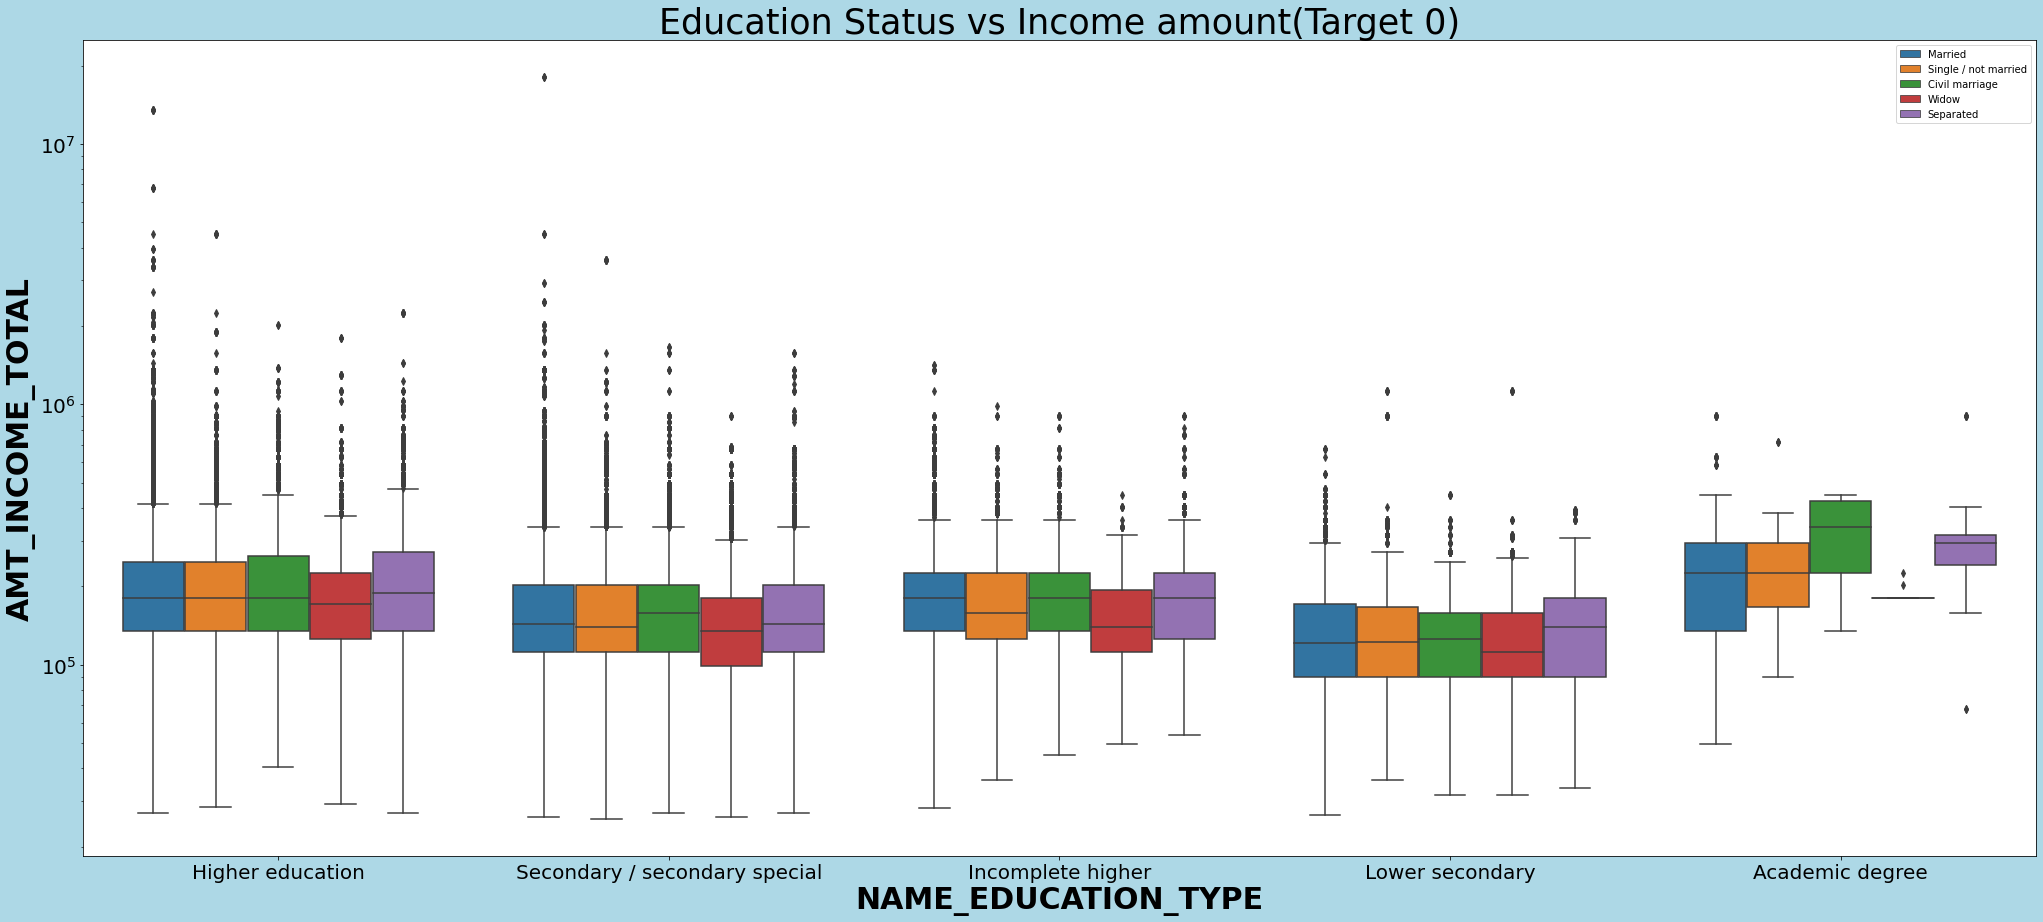

In [65]:
plt.figure(figsize=(35,15),facecolor='lightblue') 
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.legend( loc = 'upper right')                                             
plt.title('Education Status vs Income amount(Target 0)',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')                     
plt.show()

### Conclusion:
1. There are more outliers among clients with higher education, incomplete higher education, lower secondary education, and secondary/special education.

2. Based on the preceding figure, we may conclude that clients with higher education typically earn more than other clients.

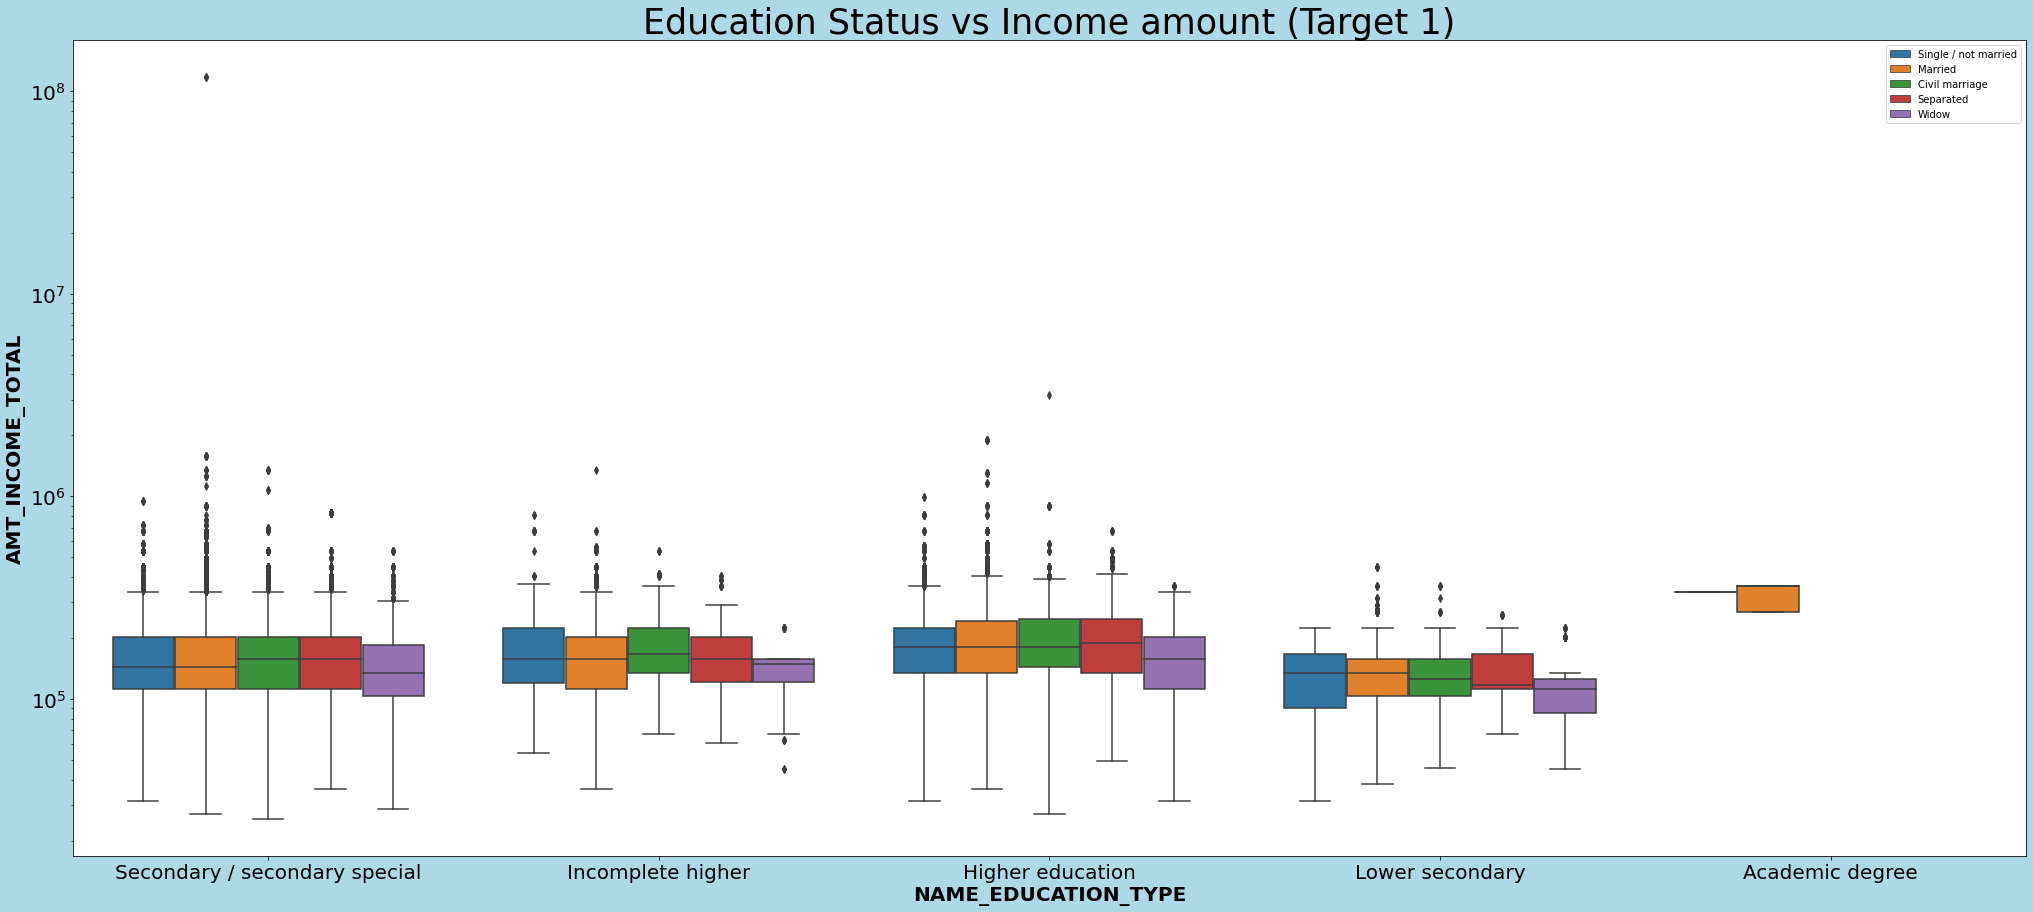

In [66]:
plt.figure(figsize=(35,15),facecolor='lightblue') 
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.legend( loc = 'upper right')                                             
plt.title('Education Status vs Income amount (Target 1)',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 20, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 20, fontweight="bold")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log') 
plt.show()

### Conclusion:
1. There are low people with Academic degree
2. Also there are low outliers in income compared to people with payment on time . 

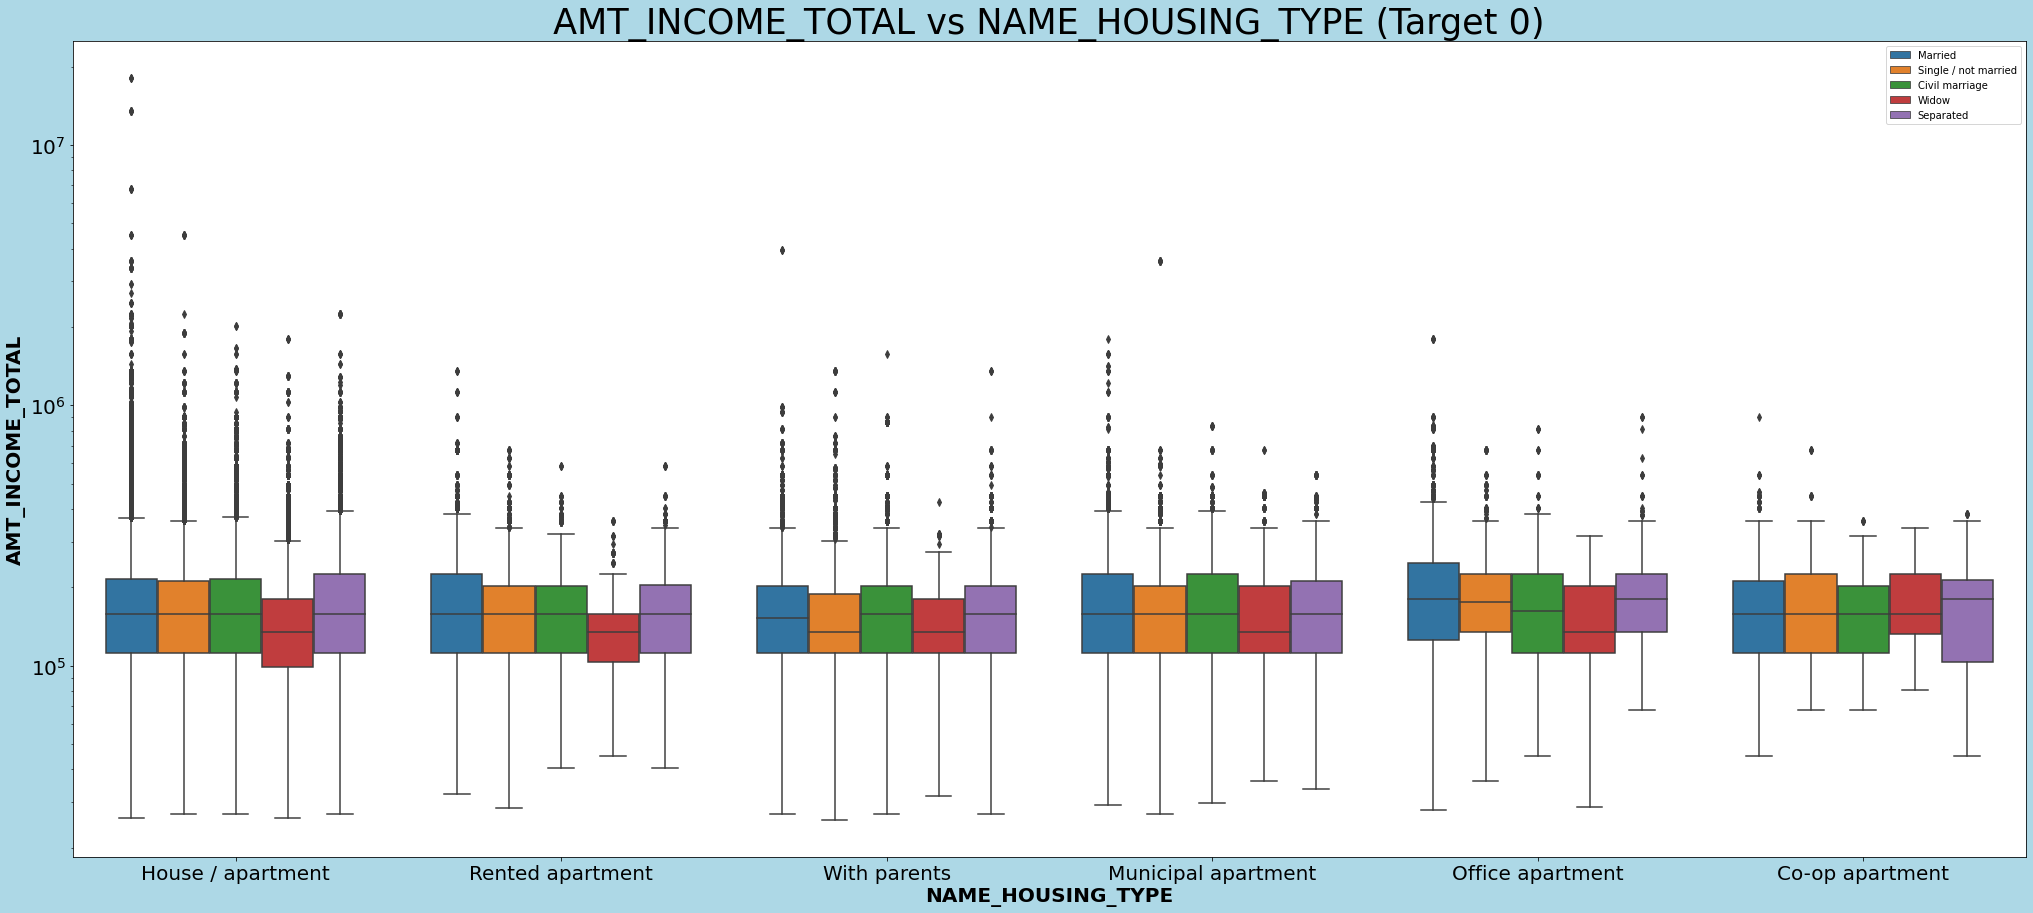

In [67]:
plt.figure(figsize=(35,15),facecolor='lightblue')
sns.boxplot(data =target0, x='NAME_HOUSING_TYPE',y='AMT_INCOME_TOTAL',hue ='NAME_FAMILY_STATUS',orient='v')
plt.legend( loc = 'upper right',)                                             
plt.title(' AMT_INCOME_TOTAL vs NAME_HOUSING_TYPE (Target 0) ',fontsize=35 )
plt.xlabel("NAME_HOUSING_TYPE",fontsize= 20, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 20, fontweight="bold")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')
plt.show()

### Conclusion :
1. The total income is higher than that of those with Target 0.
2. Those living in houses or apartments make more money than those in other types of housing.
3. Compared to those who have Target 1, there are more income outliers in terms of amount.

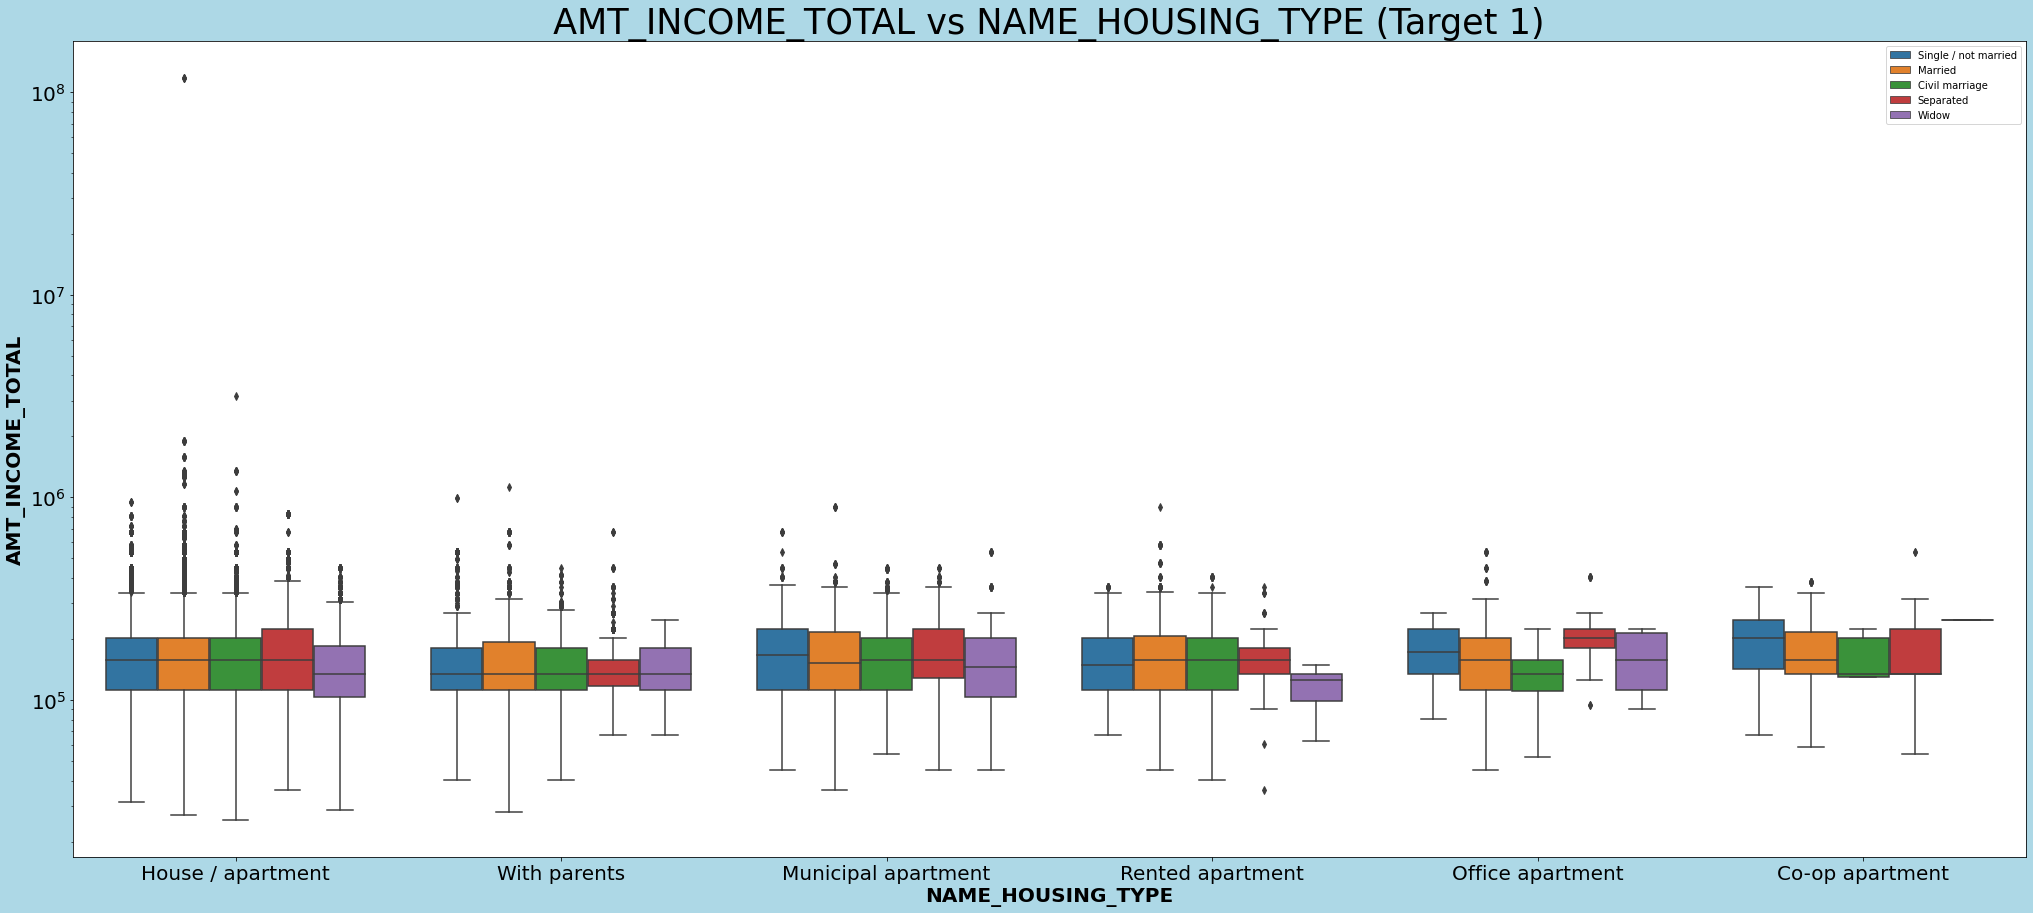

In [68]:
plt.figure(figsize=(35,15),facecolor='lightblue') 
sns.boxplot(data =target1, x='NAME_HOUSING_TYPE',y='AMT_INCOME_TOTAL',hue ='NAME_FAMILY_STATUS',orient='v')
plt.legend( loc = 'upper right',)                                             
plt.title(' AMT_INCOME_TOTAL vs NAME_HOUSING_TYPE (Target 1) ',fontsize=35 )
plt.xlabel("NAME_HOUSING_TYPE",fontsize= 20, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 20, fontweight="bold")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')
plt.show()

### Conclusion :
1. The total income is lower than that of individuals who meet Target 1.
2. Individuals living in certain types of housing Apartments and houses make more money than other

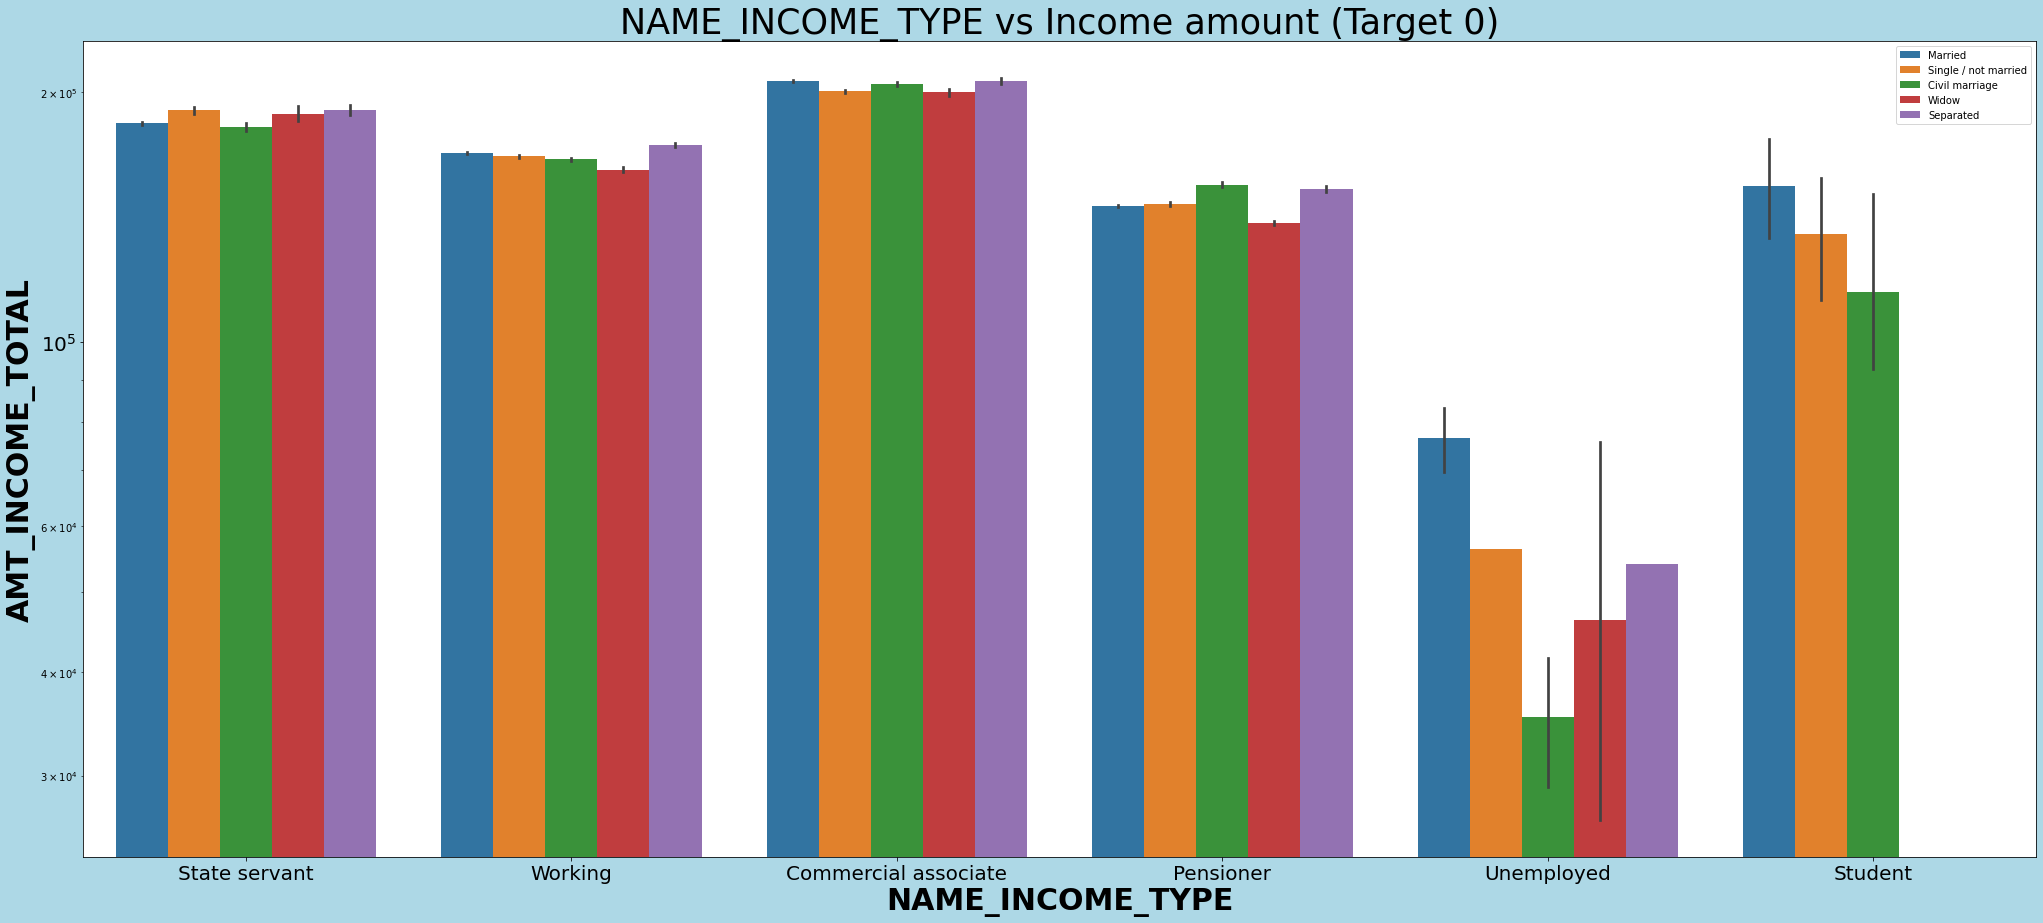

In [69]:
plt.figure(figsize=(35,15),facecolor='lightblue') 
sns.barplot(data =target0, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.legend( loc = 'upper right')                                             
plt.title('NAME_INCOME_TYPE vs Income amount (Target 0)',fontsize=35 )
plt.xlabel("NAME_INCOME_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')
plt.show()

### Conclusion:

1. Businessmen and associates are more likely to apply for loans and to not default.

2. Married businessmen make more money than other people and never fail on their loans.

3. Due to their low income, pensioners, students, and jobless people are more likely to default on their loans.


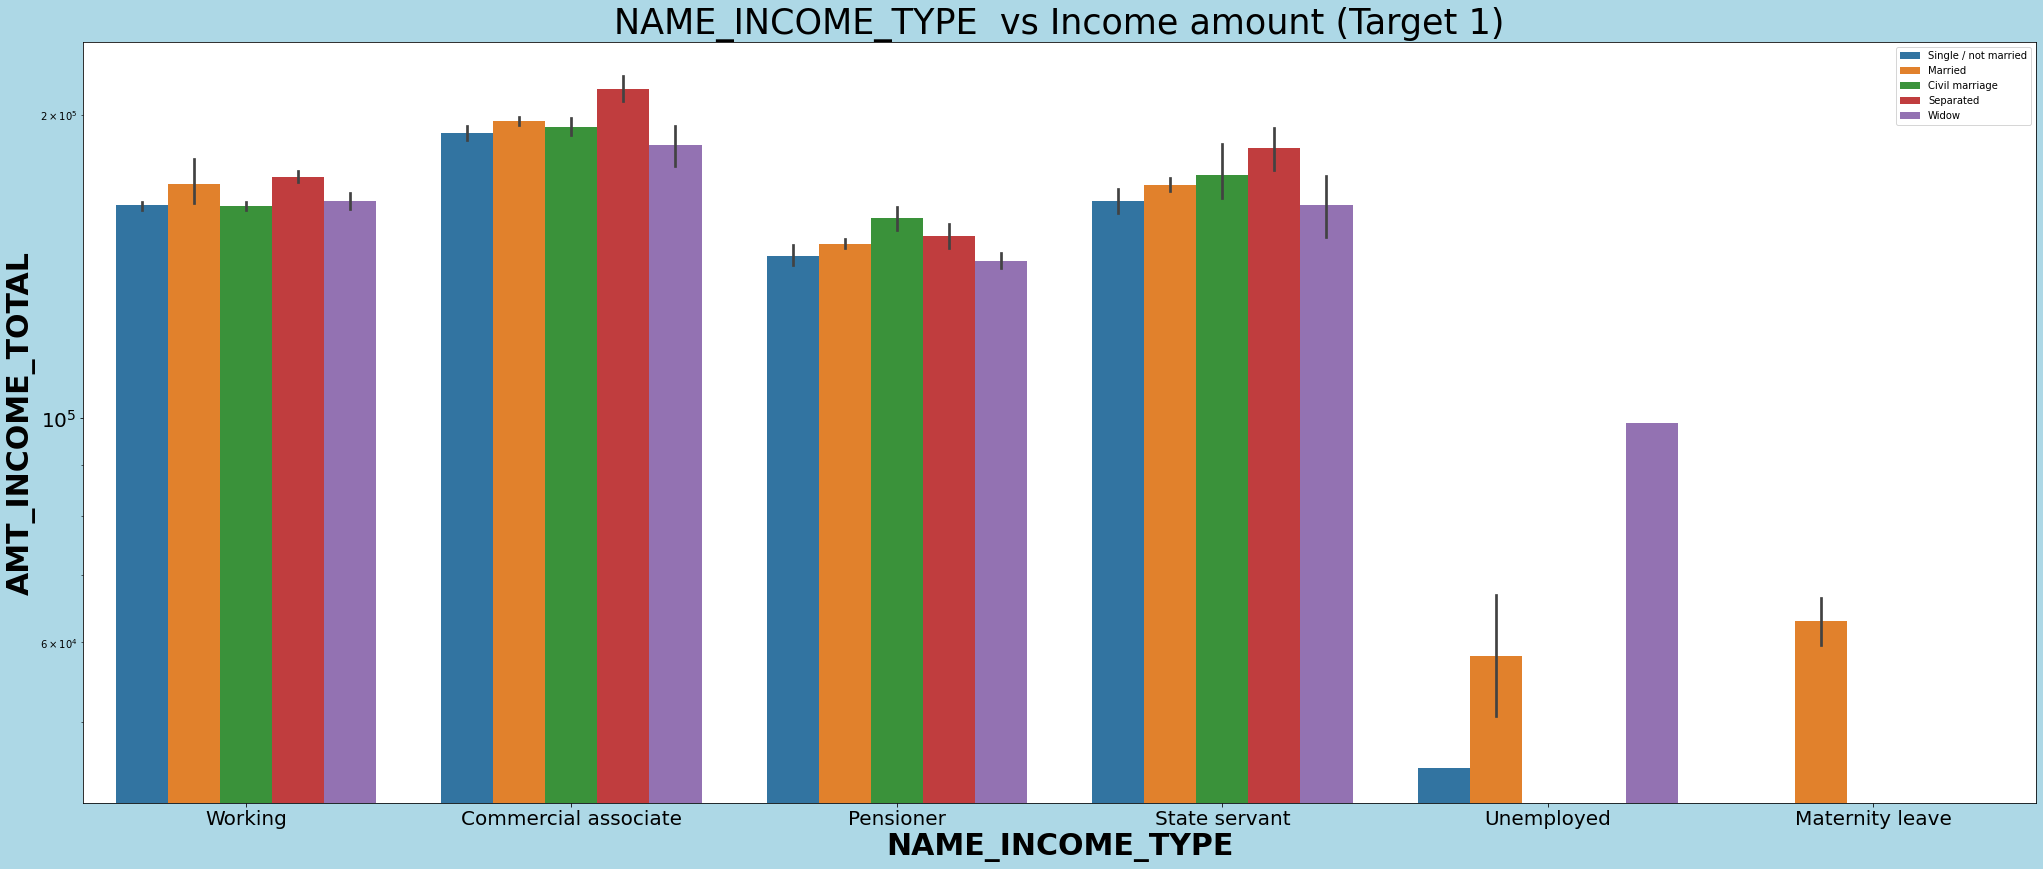

In [70]:
plt.figure(figsize=(35,14),facecolor='lightblue') 
sns.barplot(data =target1, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.legend( loc = 'upper right')                                             
plt.title('NAME_INCOME_TYPE  vs Income amount (Target 1)',fontsize=35 )
plt.xlabel("NAME_INCOME_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### Conclusion :
 1. Due to their low income, pensioners, students, and jobless people are more likely to default on their loans.
 
 2. Unemployed people are less well-off and more likely to be at danger. 

### Correlation of variable (Target 1)

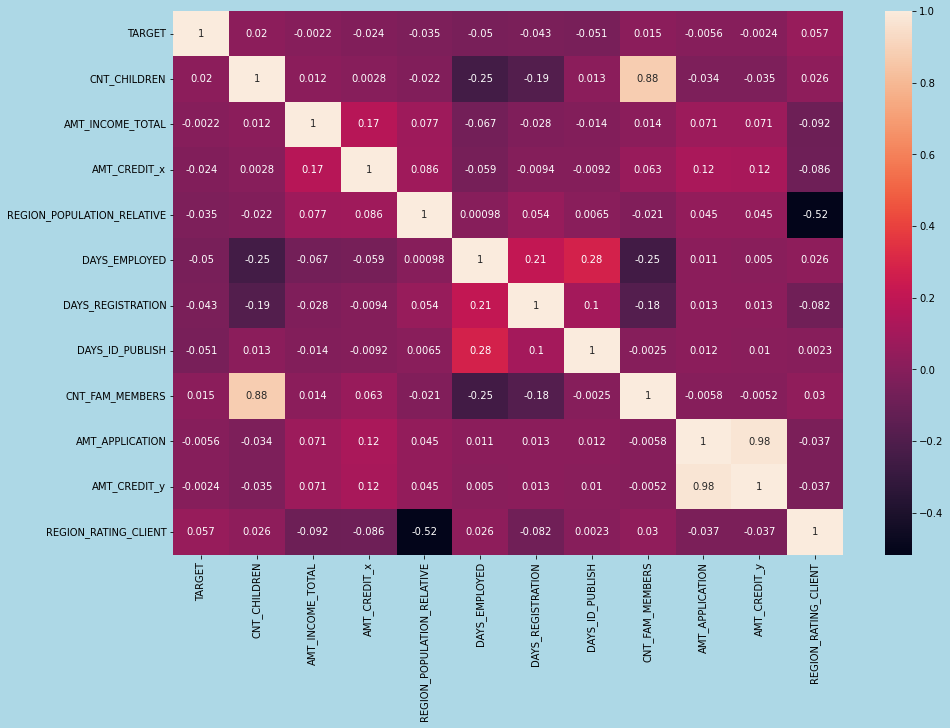

In [71]:
main_cor=main.drop(['SK_ID_CURR'],axis=1)
plt.figure(figsize=(15,10),facecolor='lightblue')
sns.heatmap(main_cor.corr(),annot=True);

In [73]:
tar_0=target0.drop(['TARGET','SK_ID_CURR'], axis=1)
tar_1=target1.drop(['TARGET','SK_ID_CURR'], axis=1)

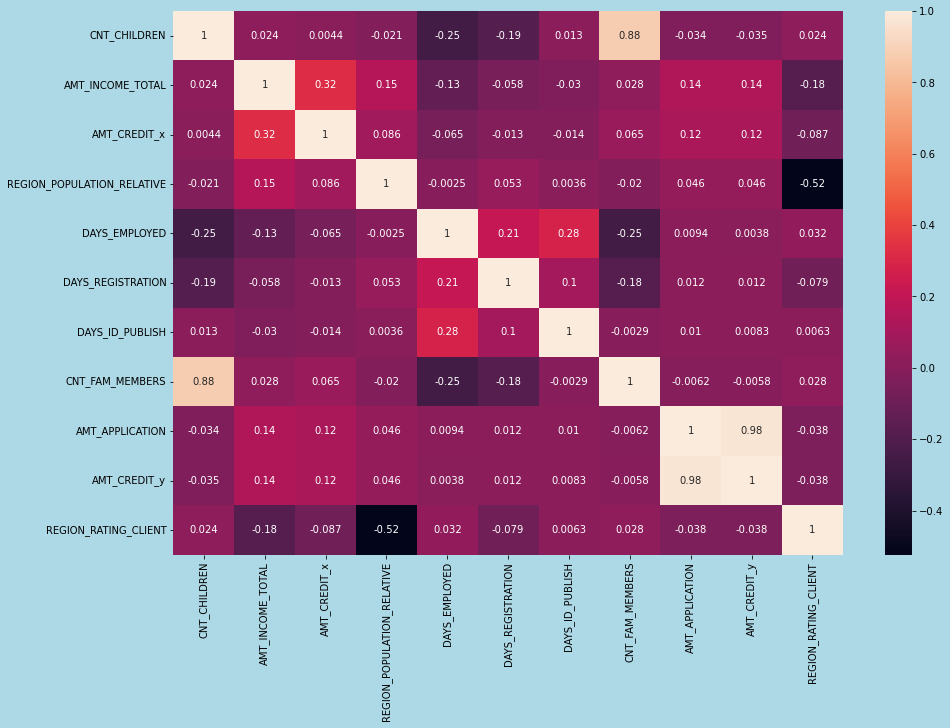

In [74]:
plt.figure(figsize=(15,10),facecolor='lightblue')
sns.heatmap(tar_0.corr(),annot=True);

### Correlation of variable (Target 1)

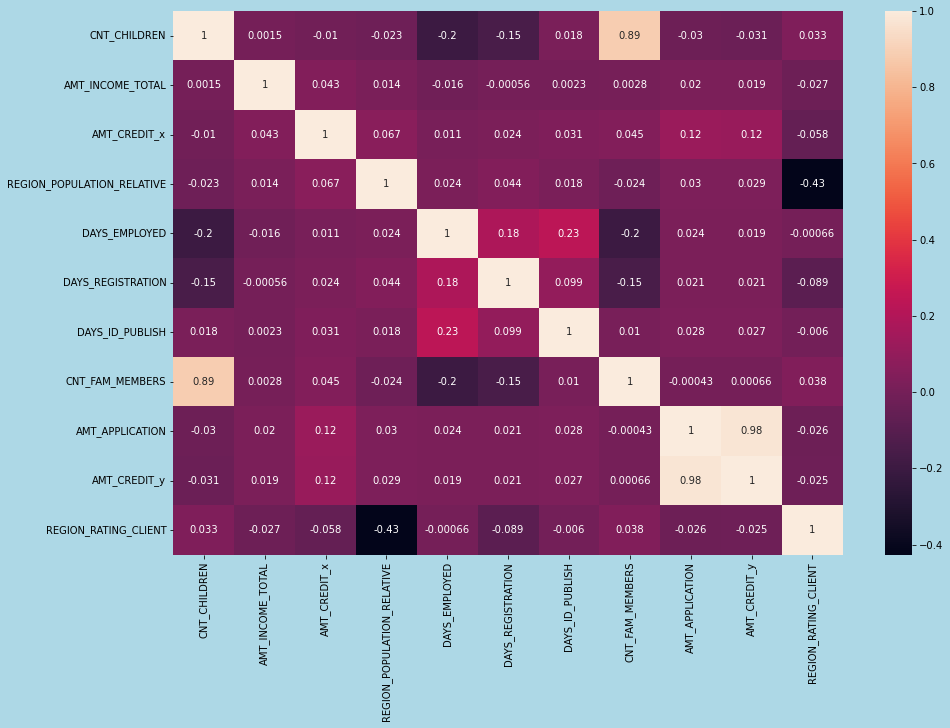

In [75]:
plt.figure(figsize=(15,10),facecolor='lightblue')
sns.heatmap(tar_1.corr(),annot=True);

## Final Conclusion :

1.Applicants who are married and have a job have a lower likelihood of defaulting.

2.We can offer loans to new consumers based on their income and occupation, taking into account their average revenue from various occupations.

3.There is a good chance that an applicant with a business or commercial associate income category won't default.

4.30 percent of borrowers who declined to say why they were in arrears.

5.Interest, Cash for an outsider,loan payments on other accounts,gasification and water provision,Auto repairs could have a high default rate.

6.A higher educated individual with an academic degree need to be given preference.

7.There is a significant default risk for male consumers with incomplete education and extremely low earnings.

8.57% of those having an income type of unemployment are at high risk of defaulting.
